# Plant Seedlings Classification Version 2


# Tags

`#Plant` `#Seedlings` `#Leaf` `#OpenCV2` `#Matplotlib` `#Seaborn` `#LabelEncoder` `#PCA` `#t-SNE` `#EigenVector` `#CNN` `#TransferLearning` `#Xception` `#VGG` `#Keras` `#Sklearn` `#ClassifierComparison` `#XGB`

* `Author : Indiano`
* `July 2020`

---

## Content


 1. Introduction (5 min)
     * Objective
     * Description
     * Evaluation
     * Imports Libraries
 2. Data Understanding (15 min)
     * Helper Functions 
     * Load data
     * Basic Statistical summaries and visualisations
 3. Data Preparation (10 min)
     * Sanitize Data
     * Categorize Class Labels
 4. Modeling, Evaluation & Submission (25 min)
     * CNN
     * Transfer Learning using Xception
     * XGB using only countour features
 5. Deployment  (5 min)
     * Submit result to Kaggle leaderboard     
 6. Further Improvements
     * Some ideas for increasing the accuracy
     
[Adopted from Cross Industry Standard Process for Data Mining (CRISP-DM)](http://www.sv-europe.com/crisp-dm-methodology/)

![CripsDM](https://i.pinimg.com/originals/d3/fe/6d/d3fe6d904580fa4e642225ae6d18f0da.jpg "Process diagram showing the relationship between the different phases of CRISP-DM")

# 1. Introduction

Plant Seedlings Classification V2

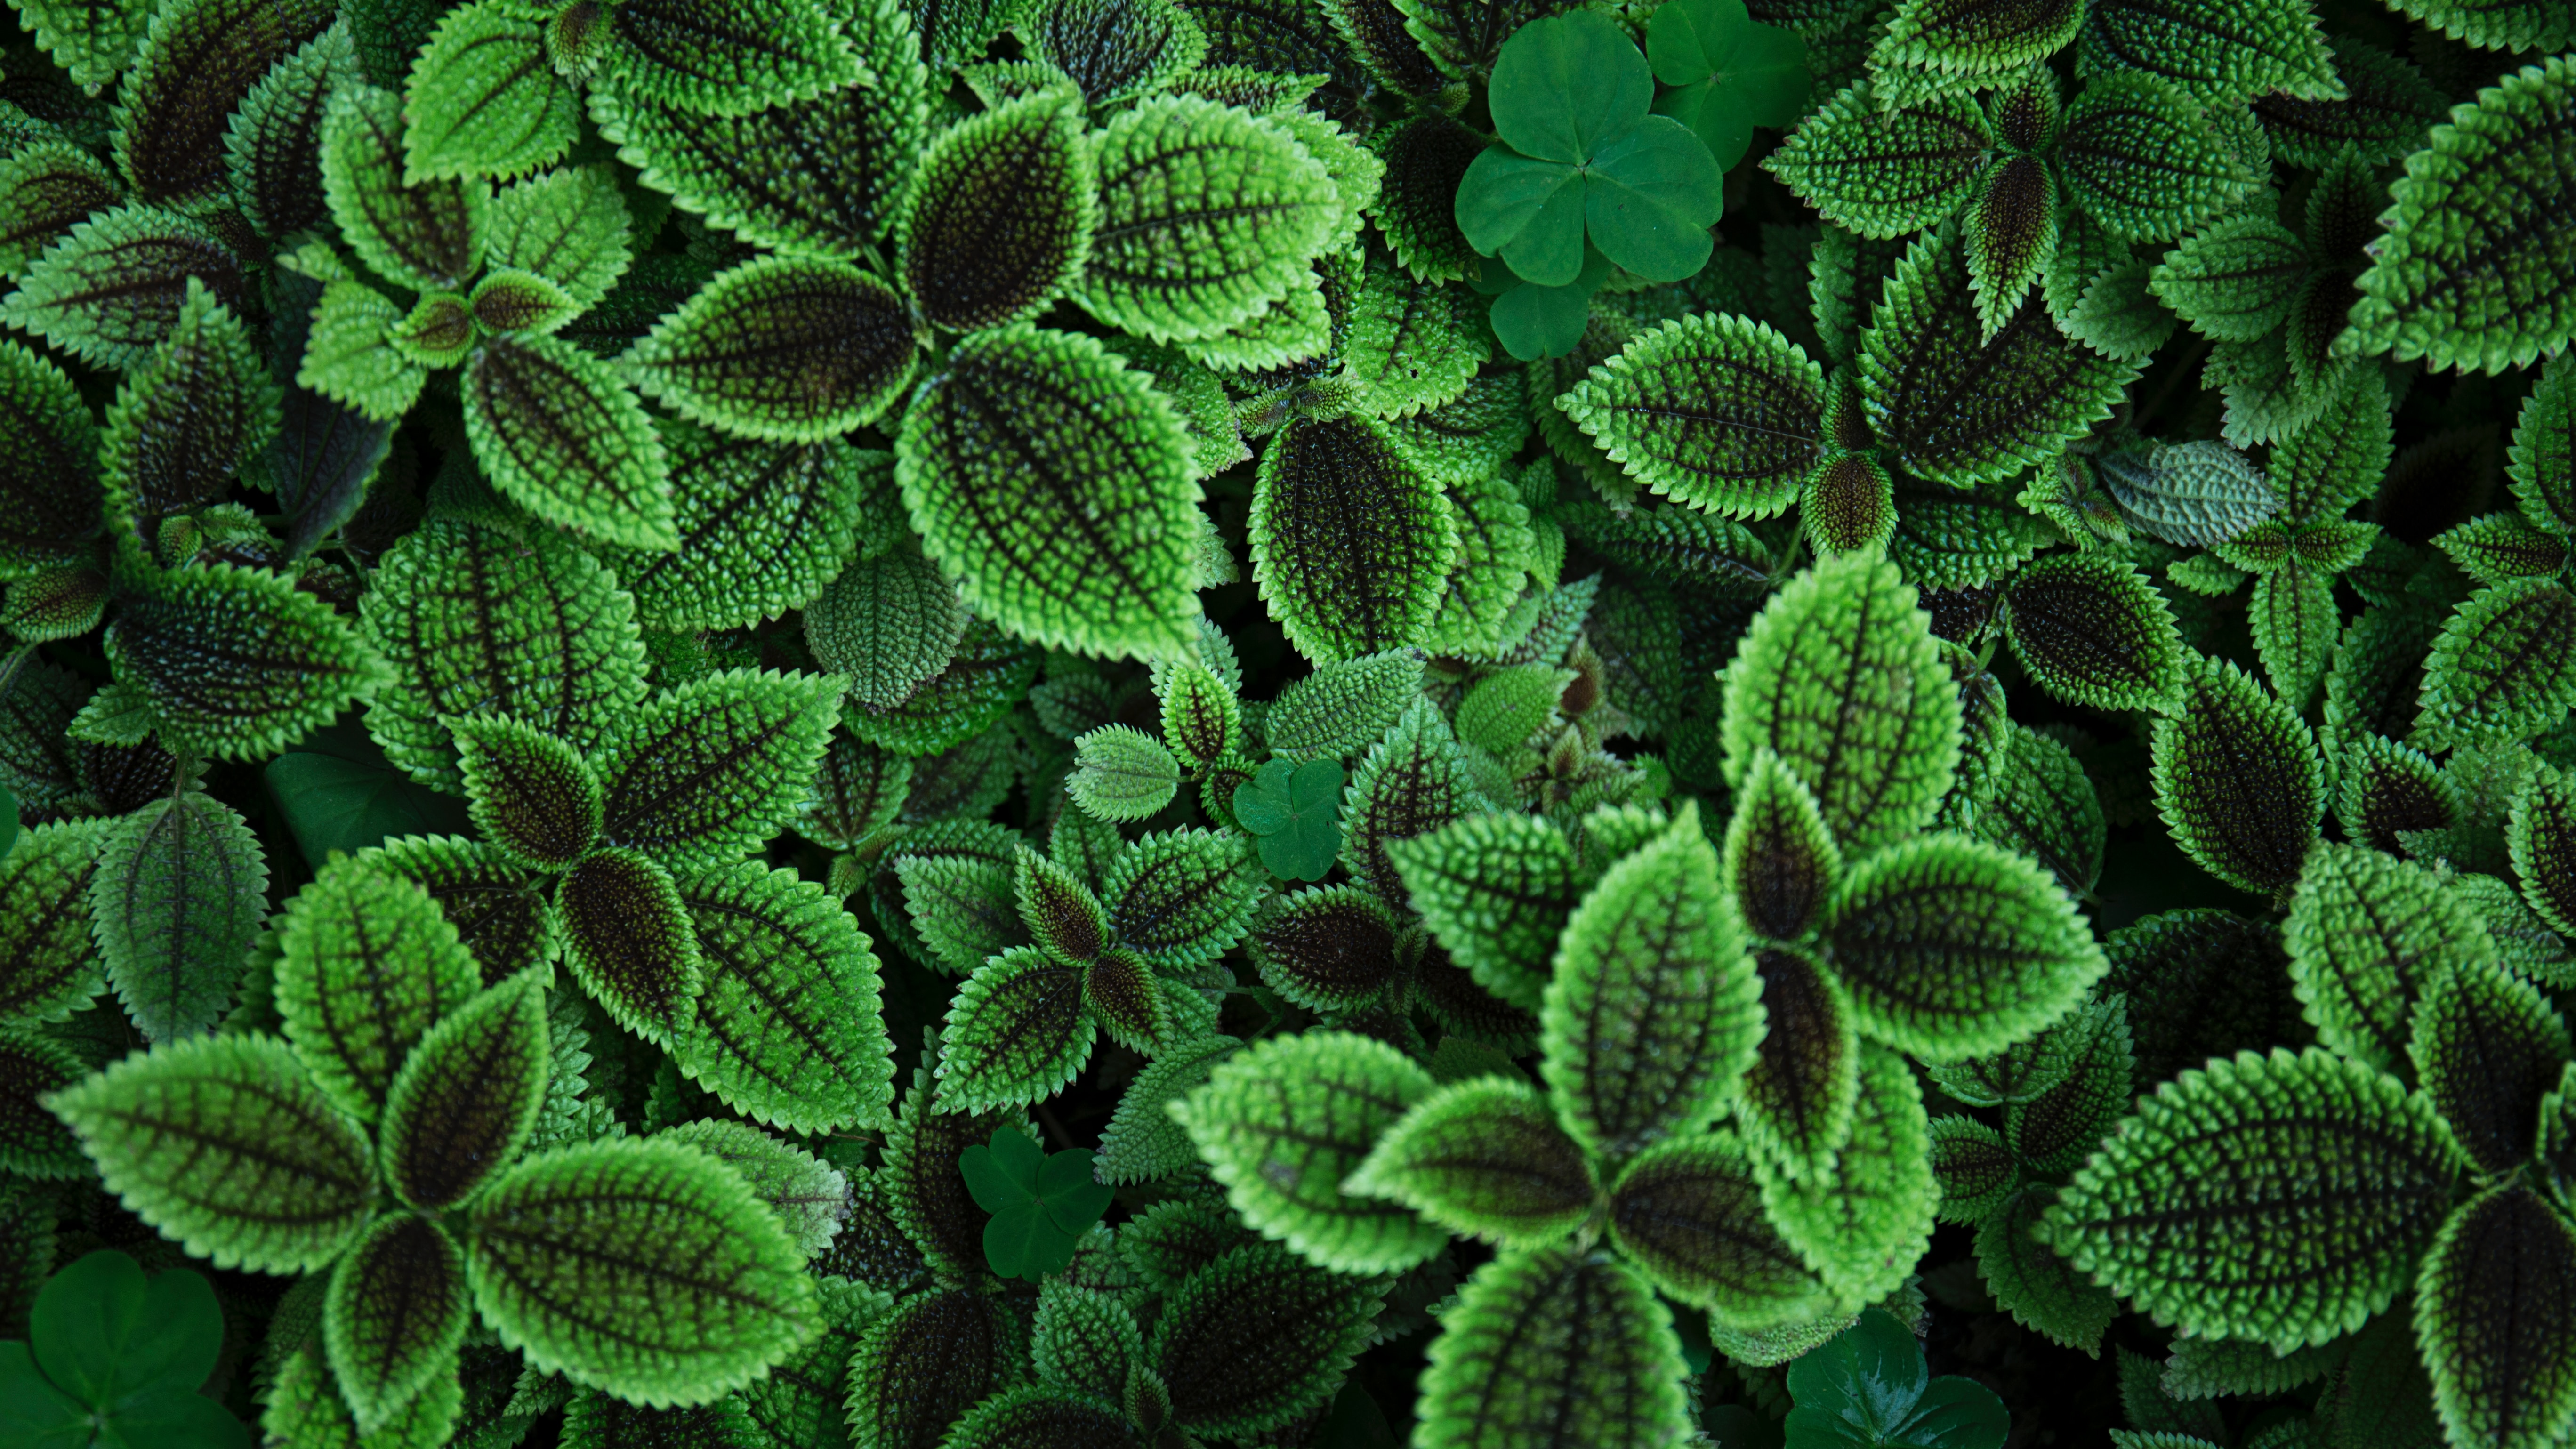

In [1]:
from IPython.display import Image
Image(filename='/home/indiano/Desktop/ren-ran-Jy6luiLBsrk-unsplash.jpg')

## 1.1 Objective

Classify `an image` of `seedling` into one the following `12 different` seedling `classes`.

1. **Black-grass**
2. **Charlock**
3. **Cleavers**
4. **Common Chickweed**
5. **Common wheat**
6. **Fat Hen**
7. **Loose Silky-bent**
8. **Maize**
9. **Scentless Mayweed**
10. **Shepherds Purse**
11. **Small-flowered Cranesbill**
12. **Sugar beet**

## 1.2 Description

Can you differentiate a `weed` from a crop `seedling`?

The ability to do so effectively can mean `better crop yields` and `better stewardship of the environment`.

### Why is it important to detect weeds while they are still seedlings?

This is what the University of Pretoria has to say regarding maize (corn) farming in southern Africa:

Successful cultivation of maize depends largely on the efficacy of weed control. Weed control during the first six to eight weeks after planting is crucial, because weeds compete vigorously with the crop for nutrients and water during this period. Annual yield losses occur as a result of weed infestations in cultivated crops. Crop yield losses that are attributable to weeds vary with type of weed, type of crop, and the environmental conditions involved. Generally, depending on the level of weed control practiced yield losses can vary from 10 to 100 %. Rarely does one experience zero yield loss due to weeds. Yield losses occur as a result of weed interference with the crop's growth and development. This explains why effective weed control is imperative. In order to do effective control the first critical requirement is correct weed identification.

### Images of crop and weed seedlings at different growth stages.

This dataset contains 5,539 images of crop and weed seedlings. The images are grouped into 12 classes. These classes represent common plant species in Danish agriculture. Each class contains rgb images that show plants at different growth stages. The images are in various sizes and are in png format.

### Citation
[A Public Image Database for Benchmark of Plant Seedling Classification Algorithms](https://arxiv.org/abs/1711.05458v1)

## 1.3 Evaluation

Submissions are evaluated on MeanFScore, which at Kaggle is actually a micro-averaged F1-score.

Given positive/negative rates for each class k, the resulting score is computed this way:


$Precisionmicro=∑k∈CTPk∑k∈CTPk+FPk$

$Recallmicro=∑k∈CTPk∑k∈CTPk+FNk$


F1-score is the harmonic mean of precision and recall


$MeanFScore=F1micro= $\Frac{2PrecisionmicroRecallmicro}{Precisionmicro+Recallmicro}$


## 1.4 Imports 

In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Theano MKL Problem
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"

# Formatting
import pprint as pretty
from tabulate import tabulate

# Memory usage
# import ipython_memory_usage.ipython_memory_usage as imu

# System related libraries
import os
import importlib
import joblib
from joblib import Parallel, delayed
from time import time

# Handle table-like data and matrices
import pickle
import numpy as np
import pandas as pd

# Collections
import shutil
from itertools import product, compress
from functools import reduce
from operator import itemgetter
from collections import defaultdict
from glob import glob

# Image
import imageio
import cv2
import skimage
import skimage.io
import skimage.transform
from skimage.transform import resize as imresize

# Sklearn
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelling Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

# Modelling Helpers
from sklearn.model_selection import train_test_split, StratifiedKFold

# Keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Flatten, Activation, Dropout, Maximum, ZeroPadding2D, Conv2D, MaxPooling2D, LeakyReLU, concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import xception, vgg16
from tensorflow.keras.metrics import categorical_crossentropy

# Tensorflow
import tensorflow as tf

# Auto-ML
import autosklearn
from tpot import TPOTClassifier

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import seaborn as sns

from IPython.display import display, HTML
from tqdm import tqdm

# Configure visualisations
plt.style.use('ggplot')
sns.set_style('white')
# pylab.rcParams[ 'figure.figsize' ] = 8 , 6
%matplotlib inline

# Monitoring memory usage in jupyter notebooks; mprof run test.py & mprof plot
# %memit

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [5]:
from numpy.random import seed
seed(21)
# Tensorlfow
tf.random.set_seed(21) 

img_size = 96

In [6]:
from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

91319_211650_bundle_archive.zip
checkpoint
data
logs
save
SeedlingsV2.ipynb



In [7]:
%ls data/all

 Black-grass/        'Fat Hen'/            'Shepherds Purse'/
 Charlock/           'Loose Silky-bent'/   'Small-flowered Cranesbill'/
 Cleavers/            Maize/               'Sugar beet'/
'Common Chickweed'/   nonsegmentedv2/
'Common wheat'/      'Scentless Mayweed'/


In [5]:
%memit

peak memory: 476.82 MiB, increment: 0.03 MiB


In [8]:
# Same as label_to_id_dict

CLASS = {
    'Black-grass': 0,
    'Charlock': 1,
    'Cleavers': 2,
    'Common Chickweed': 3,
    'Common wheat': 4,
    'Fat Hen': 5,
    'Loose Silky-bent': 6,
    'Maize': 7,
    'Scentless Mayweed': 8,
    "Shepherds Purse": 9,
    'Small-flowered Cranesbill': 10,
    'Sugar beet': 11
}

# Same as id_to_label_dict

INV_CLASS = {
    0: 'Black-grass',
    1: 'Charlock',
    2: 'Cleavers',
    3: 'Common Chickweed',
    4: 'Common wheat',
    5: 'Fat Hen',
    6: 'Loose Silky-bent',
    7: 'Maize',
    8: 'Scentless Mayweed',
    9: "Shepherds Purse",
    10: 'Small-flowered Cranesbill',
    11: 'Sugar beet'
}

# 2. Data Understanding

In [7]:
# Data directory

root_dir = './data/all'
# train_dir = os.path.join(root_dir, 'train')
# test_dir = os.path.join(root_dir, 'test')

## 2.1 Helper Functions

### 2.1.1 Mask, Segment & Sharpen Functions

The `create_mask_for_plant` function returns an image `mask matrix` of image_height * image_width shape. The mask matrix contains only boolean values of 0 & 1 indicating seedlings background and foreground region.

At the end, we will do `morphological close operation` to keep the original shape of the foreground (1 blob on the mask image) but `close the spurious small holes`. 

![alt text](https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/mor-pri-erosion.gif "Morphological Operations")

In [8]:
# Segment Mask & Sharpen for the plant


def create_mask_for_plant(image):

    # Convert to HSV image
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create mask
    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return mask


def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask=mask)
    return output


def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp


# Mask, Segment & Sharpen an Image


def mark_segment_sharpen_image(img, img_size=(45, 45)):
    # Resize image
    img = cv2.resize(img.copy(), img_size, interpolation=cv2.INTER_AREA)

    image_mask = create_mask_for_plant(img)
    image_segmented = segment_plant(img)
    image_sharpened = sharpen_image(image_segmented)

    return img, image_mask, image_segmented, image_sharpened

### 2.1.2 Contour Calculation Functions

In [9]:
# Find contours and calculate the largest contour & total area


def find_contours(mask_image):
    return cv2.findContours(mask_image, cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)[-2]


def calculate_largest_contour_area(contours):
    if len(contours) == 0:
        return 0
    c = max(contours, key=cv2.contourArea)
    return cv2.contourArea(c)


def calculate_contours_area(contours, min_contour_area=250):
    area = 0
    for c in contours:
        c_area = cv2.contourArea(c)
        if c_area >= min_contour_area:
            area += c_area
    return area

### 2.1.3 Visualize Images Functions

In [10]:
# Plot the plant images on a grid according to each class label


def image_grid_plot_for_classes(labels=['Black-grass'], nb_cols=12):

    fig = plt.figure(1, figsize=(nb_cols, nb_cols))
    grid = ImageGrid(
        fig, 111, nrows_ncols=(len(labels), nb_cols), axes_pad=0.05)

    # Iterating over different class labels
    for i, label in enumerate(labels):
        for j in range(0, nb_cols):
            axs = grid[i * nb_cols + j]
            axs.imshow(cv2.resize(images_per_class[label][j], (150, 150)))
            axs.axis('off')

        # Class label text
        axs.text(170, 75, label, verticalalignment='center')

    plt.show()


# Plot the plant images on a grid according to each class label


def grid_plot_for_class(labels=['Black-grass'], nb_cols=12):

    nb_rows, nb_cols = len(labels), nb_cols

    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))

    # Iterating over different class labels
    for i, label in enumerate(labels):
        for j in range(0, nb_cols):
            axs[i, j].imshow(
                cv2.resize(images_per_class[label][j], (150, 150)),
                aspect='auto')
            axs[i, j].axis('off')

        axs[i, j].text(170, 75, label, verticalalignment='center')

    plt.show()


# Plot the plant images according to each class label


def plot_for_class(label, nb_rows=3, nb_cols=3):

    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images_per_class[label][n])
            n += 1


# visualize_scatter_with_images


def visualize_scatter_with_images(X_2d_data,
                                  images,
                                  figsize=(45, 45),
                                  image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    plt.show()


# visualize_scatter


def visualize_scatter(data_2d, label_ids, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    plt.grid()

    nb_classes = len(np.unique(label_ids))

    for label_id in np.unique(label_ids):
        plt.scatter(
            data_2d[np.where(label_ids == label_id), 0],
            data_2d[np.where(label_ids == label_id), 1],
            marker='o',
            color=plt.cm.Set1(label_id / float(nb_classes)),
            linewidth='1',
            alpha=0.8,
            label=id_to_label_dict[label_id])
    plt.legend(loc='best')


# visualize_scatter with 3D animation


def visualize_scatter_3D(data_3d, label_ids):

    fig = plt.figure(figsize=(25, 25))
    ax = fig.add_subplot(111, projection='3d')
    plt.grid()

    nb_classes = len(np.unique(label_ids))

    for label_id in np.unique(label_ids):
        ax.scatter(
            data_3d[np.where(label_ids == label_id), 0],
            data_3d[np.where(label_ids == label_id), 1],
            data_3d[np.where(label_ids == label_id), 2],
            alpha=0.8,
            color=plt.cm.Set1(label_id / float(nb_classes)),
            marker='o',
            label=id_to_label_dict[label_id])

    ax.legend(loc='best')
    ax.view_init(25, 45)
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.set_zlim(-2.5, 2.5)

    # Create GIF
    anima = animation.FuncAnimation(
        fig,
        lambda frame_number: ax.view_init(30, 4 * frame_number),
        interval=175,
        frames=90)
    anima.save(
        os.path.join('./visualization', 'seedlings_3D.gif'),
        writer='imagemagick')

### 2.1.4 Plot the missclassified plant images on a grid & Confusion Matrix

In [35]:
# Plot the missclassified plant images on a grid


def grid_plot_for_class(missclassified, nb_cols=3):

    nb_rows = int(missclassified.shape[0] / nb_cols) + 1

    fig = plt.figure(figsize=(15, 15))

    # Iterating over different missclassified images
    for index, (_, image) in enumerate(missclassified.iterrows()):

        # Add a subplot. Either a 3-digit integer or three separate integers describing the position of the subplot.
        # If the three integers are R, C, and P in order, the subplot will take the Pth position on
        # a grid with R rows and C columns.
        axs = fig.add_subplot(nb_rows, nb_cols, index + 1)

        axs.text(
            0, -15, INV_CLASS[image['Prediction']], horizontalalignment='left')
        axs.imshow(cv2.resize(image['Image'], (150, 150)), aspect='auto')
        axs.text(
            75,
            -15,
            'True: {}'.format(INV_CLASS[image['True']]),
            horizontalalignment='left')
        axs.axis('off')

    plt.show()


# Plot the confusion matrix


def plot_confusion_matrix(cm,
                          target_names,
                          plt_name,
                          rootdir='./',
                          save_dir='save/',
                          title='Confusion matrix',
                          cmap='Jet',
                          normalize=False):
    """
        plot_confusion_matrix function prints & plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        :param cm:confusion matrix from sklearn.metrics.confusion_matrix
        :param target_names:classification classes list eg. [0, 1] ['high', 'medium', 'low']
        :param rootdir:str
        :param save_dir:str
        :param plt_name:str
        :param title:str
        :param cmap:color map list
        :param normalize:bool
        :return:
        """

    plt_name += '_ConfusionMatrix'
    if normalize:
        plt_name = '{}_Normalized'.format(plt_name)

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                "{:0.4f}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(
                j,
                i,
                "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n\nAccuracy={:0.4f}; Misclassified={:0.4f}'.
               format(accuracy, misclass))

    print('\n\nSaving Confusion Matrices in the {} directory'.format(rootdir +
                                                                     save_dir))
    plt.savefig(
        rootdir + save_dir + '/{}.png'.format(plt_name),
        dpi=200,
        format='png',
        bbox_inches='tight')

    plt.show()
    plt.close()

## 2.2 Load Data

Let's read the seedlings images in `BGR` (Blue/Green/Red) OpenCV's default format. It won't affect the segmentation in-case if you'd like to use `RGB` format. Anyhow, `HSV` (Hue/Saturation/Value) color space will be used for the processing of images.

### First Approach: Using Simple dictionary

In [12]:
# Flatten the plant images data after Segmentation & Masking


def load_seedlings(root_dir, init_img_size=(150, 150),
                   final_img_size=(45, 45)):
    images = []
    labels = []
    images_per_class = defaultdict(list)

    for class_folder_name in os.listdir(root_dir):
        class_folder_path = os.path.join(root_dir, class_folder_name)

        for image_path in glob(os.path.join(class_folder_path, "*.png")):
            # Read an image
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)

            # Stats for each seedlings class
            images_per_class[class_folder_name].append(image)

            # Resize image to default init_img_size pixels 150*150
            image = cv2.resize(image, init_img_size, interpolation=cv2.INTER_AREA)

            # Segementation
            image = segment_plant(image)

            # BGR2GRAY conversion
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Resize image to default final_img_size pixels 45*45
            if (init_img_size != final_img_size):
                image = cv2.resize(
                    image, final_img_size, interpolation=cv2.INTER_AREA)

            image = image.flatten()

            images.append(image)
            labels.append(class_folder_name)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, images_per_class

In [13]:
# Load Images, Labels & images_per_class dict

images, labels, images_per_class = np.array([]), np.array([]), np.array([])

try:
    print('Loading Images, Labels & images_per_class dict ...')
    images = joblib.load(os.path.join('./save/pickles', 'images.pickle'))
    labels = joblib.load(os.path.join('./save/pickles', 'labels.pickle'))
    images_per_class = joblib.load(
        os.path.join('./save/pickles', 'images_per_class.pickle'))
    print('Loading done.')
except Exception as e:
    print('Stacktrace', e)
    print('Images, Labels or images_per_class dict does not exist.')

if not (images.size or labels.size) or (not images_per_class):
    print('Running load_seedlings method ...')
    images, labels, images_per_class = load_seedlings(root_dir, final_img_size=(96, 96))

    print('Dumping Images, Labels & images_per_class dict ...')
    
    if not os.path.exists('./save/pickles'):
        os.makedirs('./save/pickles')
    
    # Dumping dicts
    joblib.dump(images, os.path.join('./save/pickles', 'images.pickle'))
    joblib.dump(labels, os.path.join('./save/pickles', 'labels.pickle'))
    joblib.dump(images_per_class,
                os.path.join('./save/pickles', 'images_per_class.pickle'))
    print('Images, Labels or images_per_class dict dumping done.')

Loading Images, Labels & images_per_class dict ...
Loading done.


#### Number of images per class

In [14]:
for key, value in images_per_class.items():
    print("{0} -> {1}".format(key, len(value)))

Small-flowered Cranesbill -> 576
Cleavers -> 335
Loose Silky-bent -> 762
Sugar beet -> 463
Charlock -> 452
Fat Hen -> 538
Maize -> 257
Scentless Mayweed -> 607
Shepherd’s Purse -> 274
Common Chickweed -> 713
Black-grass -> 309
Common wheat -> 253


### Second Approach: Using Train & Test dictionary 

In [14]:
# Resize all image to 96*96
def img_reshape(img):
    img = imresize(img, (img_size, img_size, 3))
    return img


# get image tag
def img_label(path):
    return str(str(path.split('/')[-1]))


# get plant class on image
def img_class(path):
    return str(path.split('/')[-2])


# fill train and test dict
def fill_dict(paths, some_dict):

    for p in tqdm(paths, ascii=True, desc="loading"):
        print(p)
        img = imageio.imread(p)
        img = img_reshape(img)
        some_dict['image'].append(img)
        some_dict['label'].append(img_class(p))

    return some_dict


# read image from dir. and fill train and test dict
def reader():
    file_ext = []
    train_path = []
    test_path = []

    for root, dirs, files in os.walk('./data/test'):
        if dirs != []:
            print('Root:\n' + str(root))
            print('Dirs:\n' + str(dirs))
        else:
            for f in files:
                ext = os.path.splitext(str(f))[1][1:]

                if ext not in file_ext:
                    file_ext.append(ext)

#                 if 'train' in root:
                path = os.path.join(root, f)
                train_path.append(path)
#                 elif 'test' in root:
#                     path = os.path.join(root, f)
#                     test_path.append(path)
    train_dict = {'image': [], 'label': []}
#     test_dict = {'image': [], 'label': []}

    train_dict = fill_dict(train_path, train_dict)
#     test_dict = fill_dict(test_path, test_dict)

    return train_dict

In [15]:
test_dict = reader()

loading:   0%|          | 0/309 [00:00<?, ?it/s]

Root:
./data/test
Dirs:
['Black-grass']
./data/test/Black-grass/208.png
./data/test/Black-grass/115.png


loading:   2%|1         | 5/309 [00:00<00:35,  8.59it/s]

./data/test/Black-grass/263.png
./data/test/Black-grass/8.png
./data/test/Black-grass/200.png
./data/test/Black-grass/270.png
./data/test/Black-grass/211.png
./data/test/Black-grass/153.png


loading:   3%|2         | 8/309 [00:00<00:27, 10.85it/s]

./data/test/Black-grass/63.png


loading:   5%|5         | 16/309 [00:01<00:43,  6.78it/s]

./data/test/Black-grass/169.png
./data/test/Black-grass/238.png
./data/test/Black-grass/1.png
./data/test/Black-grass/32.png
./data/test/Black-grass/205.png
./data/test/Black-grass/35.png
./data/test/Black-grass/234.png
./data/test/Black-grass/138.png
./data/test/Black-grass/113.png


loading:   6%|6         | 19/309 [00:01<00:38,  7.56it/s]

./data/test/Black-grass/97.png
./data/test/Black-grass/328.png


loading:   7%|7         | 22/309 [00:02<00:36,  7.82it/s]

./data/test/Black-grass/118.png
./data/test/Black-grass/17.png
./data/test/Black-grass/49-2.png


loading:   9%|9         | 28/309 [00:02<00:26, 10.56it/s]

./data/test/Black-grass/266.png
./data/test/Black-grass/206.png
./data/test/Black-grass/6.png
./data/test/Black-grass/199.png
./data/test/Black-grass/314.png
./data/test/Black-grass/267.png
./data/test/Black-grass/41.png
./data/test/Black-grass/274.png


loading:  11%|#         | 33/309 [00:02<00:20, 13.34it/s]

./data/test/Black-grass/333.png
./data/test/Black-grass/308.png
./data/test/Black-grass/157.png
./data/test/Black-grass/277.png


loading:  12%|#1        | 36/309 [00:03<00:26, 10.38it/s]

./data/test/Black-grass/220.png
./data/test/Black-grass/288.png


loading:  12%|#2        | 38/309 [00:03<00:28,  9.63it/s]

./data/test/Black-grass/77.png
./data/test/Black-grass/103.png
./data/test/Black-grass/196.png
./data/test/Black-grass/283.png
./data/test/Black-grass/110.png
./data/test/Black-grass/331.png
./data/test/Black-grass/246.png
./data/test/Black-grass/296.png


loading:  15%|#4        | 45/309 [00:03<00:20, 12.60it/s]

./data/test/Black-grass/286.png
./data/test/Black-grass/147.png


loading:  17%|#6        | 51/309 [00:06<01:01,  4.22it/s]

./data/test/Black-grass/178.png
./data/test/Black-grass/85.png
./data/test/Black-grass/175.png
./data/test/Black-grass/245.png
./data/test/Black-grass/214.png
./data/test/Black-grass/191.png


loading:  18%|#7        | 55/309 [00:06<00:42,  5.96it/s]

./data/test/Black-grass/253.png
./data/test/Black-grass/312.png
./data/test/Black-grass/268.png
./data/test/Black-grass/116.png
./data/test/Black-grass/334.png
./data/test/Black-grass/272.png
./data/test/Black-grass/248.png
./data/test/Black-grass/40.png
./data/test/Black-grass/256.png
./data/test/Black-grass/279.png


loading:  20%|##        | 63/309 [00:06<00:30,  8.11it/s]

./data/test/Black-grass/151.png
./data/test/Black-grass/121.png
./data/test/Black-grass/55.png


loading:  21%|##1       | 66/309 [00:07<00:27,  8.89it/s]

./data/test/Black-grass/143.png
./data/test/Black-grass/135.png


loading:  22%|##2       | 69/309 [00:07<00:29,  8.09it/s]

./data/test/Black-grass/307.png
./data/test/Black-grass/223.png


loading:  23%|##2       | 71/309 [00:07<00:31,  7.58it/s]

./data/test/Black-grass/230.png
./data/test/Black-grass/30.png
./data/test/Black-grass/104.png


loading:  24%|##4       | 75/309 [00:07<00:23,  9.99it/s]

./data/test/Black-grass/209.png
./data/test/Black-grass/69.png
./data/test/Black-grass/50.png
./data/test/Black-grass/166.png


loading:  27%|##6       | 82/309 [00:08<00:23,  9.75it/s]

./data/test/Black-grass/149.png
./data/test/Black-grass/91.png
./data/test/Black-grass/78.png
./data/test/Black-grass/280.png
./data/test/Black-grass/216.png
./data/test/Black-grass/239.png


loading:  28%|##7       | 85/309 [00:09<00:29,  7.72it/s]

./data/test/Black-grass/137.png
./data/test/Black-grass/54.png
./data/test/Black-grass/108.png
./data/test/Black-grass/260.png
./data/test/Black-grass/241.png
./data/test/Black-grass/24.png
./data/test/Black-grass/59.png


loading:  29%|##9       | 90/309 [00:09<00:22,  9.63it/s]

./data/test/Black-grass/37.png
./data/test/Black-grass/44.png


loading:  30%|##9       | 92/309 [00:09<00:23,  9.28it/s]

./data/test/Black-grass/224.png


loading:  31%|###1      | 97/309 [00:10<00:36,  5.78it/s]

./data/test/Black-grass/297.png
./data/test/Black-grass/128.png
./data/test/Black-grass/130.png
./data/test/Black-grass/72.png
./data/test/Black-grass/31.png
./data/test/Black-grass/36.png


loading:  33%|###2      | 101/309 [00:11<00:28,  7.28it/s]

./data/test/Black-grass/170.png
./data/test/Black-grass/229.png
./data/test/Black-grass/119.png
./data/test/Black-grass/53.png
./data/test/Black-grass/167.png


loading:  34%|###3      | 105/309 [00:11<00:21,  9.54it/s]

./data/test/Black-grass/306.png
./data/test/Black-grass/159.png


loading:  36%|###5      | 110/309 [00:13<00:44,  4.48it/s]

./data/test/Black-grass/180.png
./data/test/Black-grass/315.png
./data/test/Black-grass/131.png
./data/test/Black-grass/70.png
./data/test/Black-grass/154.png
./data/test/Black-grass/112.png
./data/test/Black-grass/127.png


loading:  37%|###6      | 113/309 [00:13<00:37,  5.30it/s]

./data/test/Black-grass/49-1.png
./data/test/Black-grass/222.png


loading:  37%|###7      | 115/309 [00:14<00:32,  5.89it/s]

./data/test/Black-grass/148.png
./data/test/Black-grass/181.png
./data/test/Black-grass/15.png
./data/test/Black-grass/227.png


loading:  39%|###9      | 121/309 [00:14<00:21,  8.85it/s]

./data/test/Black-grass/212.png
./data/test/Black-grass/12.png
./data/test/Black-grass/111.png
./data/test/Black-grass/275.png


loading:  40%|###9      | 123/309 [00:14<00:17, 10.56it/s]

./data/test/Black-grass/255.png
./data/test/Black-grass/42.png
./data/test/Black-grass/301.png


loading:  42%|####1     | 129/309 [00:14<00:13, 13.14it/s]

./data/test/Black-grass/89.png
./data/test/Black-grass/258.png
./data/test/Black-grass/289.png
./data/test/Black-grass/262.png
./data/test/Black-grass/18.png
./data/test/Black-grass/26.png
./data/test/Black-grass/330.png


loading:  43%|####3     | 133/309 [00:15<00:10, 16.21it/s]

./data/test/Black-grass/185.png
./data/test/Black-grass/64.png
./data/test/Black-grass/285.png


loading:  44%|####4     | 136/309 [00:18<01:11,  2.41it/s]

./data/test/Black-grass/92.png
./data/test/Black-grass/43.png


loading:  45%|####4     | 138/309 [00:19<01:00,  2.81it/s]

./data/test/Black-grass/68.png


loading:  48%|####7     | 148/309 [00:21<00:59,  2.72it/s]

./data/test/Black-grass/146.png
./data/test/Black-grass/265.png
./data/test/Black-grass/133.png
./data/test/Black-grass/322.png
./data/test/Black-grass/249.png
./data/test/Black-grass/179.png
./data/test/Black-grass/287.png
./data/test/Black-grass/295.png
./data/test/Black-grass/7.png
./data/test/Black-grass/290.png
./data/test/Black-grass/305.png
./data/test/Black-grass/303.png


loading:  49%|####8     | 151/309 [00:21<00:47,  3.30it/s]

./data/test/Black-grass/16.png
./data/test/Black-grass/162.png
./data/test/Black-grass/139.png


loading:  50%|####9     | 154/309 [00:21<00:38,  4.00it/s]

./data/test/Black-grass/33.png
./data/test/Black-grass/226.png
./data/test/Black-grass/310.png
./data/test/Black-grass/183.png
./data/test/Black-grass/294.png


loading:  51%|#####1    | 159/309 [00:22<00:30,  4.97it/s]

./data/test/Black-grass/323.png
./data/test/Black-grass/313.png
./data/test/Black-grass/273.png


loading:  53%|#####3    | 165/309 [00:22<00:19,  7.28it/s]

./data/test/Black-grass/259.png
./data/test/Black-grass/188.png
./data/test/Black-grass/56.png
./data/test/Black-grass/215.png


loading:  55%|#####5    | 171/309 [00:23<00:15,  9.17it/s]

./data/test/Black-grass/29.png
./data/test/Black-grass/75.png
./data/test/Black-grass/80.png
./data/test/Black-grass/219.png
./data/test/Black-grass/39.png
./data/test/Black-grass/129.png


loading:  56%|#####5    | 173/309 [00:24<00:31,  4.31it/s]

./data/test/Black-grass/192.png
./data/test/Black-grass/46.png
./data/test/Black-grass/87.png
./data/test/Black-grass/311.png


loading:  57%|#####6    | 176/309 [00:24<00:26,  4.98it/s]

./data/test/Black-grass/21.png
./data/test/Black-grass/136.png
./data/test/Black-grass/150.png


loading:  59%|#####8    | 181/309 [00:25<00:21,  5.88it/s]

./data/test/Black-grass/329.png
./data/test/Black-grass/197.png
./data/test/Black-grass/276.png
./data/test/Black-grass/134.png
./data/test/Black-grass/318.png


loading:  60%|#####9    | 184/309 [00:27<00:43,  2.85it/s]

./data/test/Black-grass/114.png
./data/test/Black-grass/213.png
./data/test/Black-grass/67.png
./data/test/Black-grass/187.png
./data/test/Black-grass/320.png
./data/test/Black-grass/88.png
./data/test/Black-grass/284.png


loading:  63%|######2   | 194/309 [00:28<00:21,  5.25it/s]

./data/test/Black-grass/156.png
./data/test/Black-grass/176.png
./data/test/Black-grass/144.png
./data/test/Black-grass/193.png
./data/test/Black-grass/164.png


loading:  63%|######3   | 196/309 [00:28<00:17,  6.38it/s]

./data/test/Black-grass/106.png
./data/test/Black-grass/207.png


loading:  66%|######5   | 203/309 [00:29<00:25,  4.18it/s]

./data/test/Black-grass/5.png
./data/test/Black-grass/99.png
./data/test/Black-grass/28.png
./data/test/Black-grass/173.png
./data/test/Black-grass/225.png
./data/test/Black-grass/62.png


loading:  67%|######6   | 207/309 [00:30<00:15,  6.57it/s]

./data/test/Black-grass/86.png
./data/test/Black-grass/186.png
./data/test/Black-grass/324.png
./data/test/Black-grass/243.png


loading:  68%|######7   | 210/309 [00:30<00:11,  8.52it/s]

./data/test/Black-grass/174.png
./data/test/Black-grass/327.png
./data/test/Black-grass/145.png


loading:  71%|#######1  | 220/309 [00:31<00:10,  8.40it/s]

./data/test/Black-grass/326.png
./data/test/Black-grass/27.png
./data/test/Black-grass/84.png
./data/test/Black-grass/82.png
./data/test/Black-grass/9.png
./data/test/Black-grass/251.png
./data/test/Black-grass/100.png
./data/test/Black-grass/142.png
./data/test/Black-grass/74.png
./data/test/Black-grass/93.png
./data/test/Black-grass/19.png
./data/test/Black-grass/109.png
./data/test/Black-grass/107.png
./data/test/Black-grass/155.png


loading:  73%|#######2  | 225/309 [00:31<00:08,  9.45it/s]

./data/test/Black-grass/233.png
./data/test/Black-grass/189.png
./data/test/Black-grass/236.png


loading:  75%|#######5  | 232/309 [00:32<00:07, 10.35it/s]

./data/test/Black-grass/51.png
./data/test/Black-grass/90.png
./data/test/Black-grass/278.png
./data/test/Black-grass/240.png
./data/test/Black-grass/325.png


loading:  77%|#######7  | 238/309 [00:32<00:05, 13.95it/s]

./data/test/Black-grass/94.png
./data/test/Black-grass/254.png
./data/test/Black-grass/291.png
./data/test/Black-grass/309.png
./data/test/Black-grass/14.png
./data/test/Black-grass/242.png
./data/test/Black-grass/117.png


loading:  78%|#######7  | 241/309 [00:32<00:06, 11.11it/s]

./data/test/Black-grass/269.png
./data/test/Black-grass/321.png


loading:  80%|#######9  | 247/309 [00:33<00:06,  9.35it/s]

./data/test/Black-grass/11.png
./data/test/Black-grass/98.png
./data/test/Black-grass/96.png
./data/test/Black-grass/81.png
./data/test/Black-grass/76.png
./data/test/Black-grass/163.png


loading:  81%|########1 | 251/309 [00:34<00:06,  8.51it/s]

./data/test/Black-grass/101.png
./data/test/Black-grass/83.png
./data/test/Black-grass/71.png
./data/test/Black-grass/271.png
./data/test/Black-grass/332.png
./data/test/Black-grass/3.png
./data/test/Black-grass/165.png
./data/test/Black-grass/23.png
./data/test/Black-grass/140.png
./data/test/Black-grass/221.png


loading:  83%|########3 | 258/309 [00:34<00:04, 10.24it/s]

./data/test/Black-grass/184.png
./data/test/Black-grass/298.png
./data/test/Black-grass/182.png
./data/test/Black-grass/194.png
./data/test/Black-grass/120.png


loading:  86%|########6 | 267/309 [00:34<00:02, 14.32it/s]

./data/test/Black-grass/13.png
./data/test/Black-grass/252.png
./data/test/Black-grass/132.png
./data/test/Black-grass/317.png
./data/test/Black-grass/105.png
./data/test/Black-grass/161.png


loading:  87%|########7 | 270/309 [00:35<00:05,  7.17it/s]

./data/test/Black-grass/172.png
./data/test/Black-grass/190.png
./data/test/Black-grass/177.png
./data/test/Black-grass/49-3.png


loading:  88%|########8 | 273/309 [00:36<00:04,  7.89it/s]

./data/test/Black-grass/45.png
./data/test/Black-grass/10.png


loading:  90%|########9 | 278/309 [00:36<00:03,  8.76it/s]

./data/test/Black-grass/66.png
./data/test/Black-grass/228.png
./data/test/Black-grass/293.png
./data/test/Black-grass/201.png
./data/test/Black-grass/47.png
./data/test/Black-grass/257.png
./data/test/Black-grass/160.png


loading:  93%|#########2| 286/309 [00:36<00:01, 14.06it/s]

./data/test/Black-grass/95.png
./data/test/Black-grass/38.png
./data/test/Black-grass/22.png
./data/test/Black-grass/264.png
./data/test/Black-grass/60.png
./data/test/Black-grass/52.png


loading:  94%|#########3| 289/309 [00:37<00:02,  7.17it/s]

./data/test/Black-grass/58.png
./data/test/Black-grass/102.png
./data/test/Black-grass/171.png


loading:  94%|#########4| 291/309 [00:38<00:02,  6.49it/s]

./data/test/Black-grass/292.png
./data/test/Black-grass/210.png


loading:  96%|#########5| 296/309 [00:38<00:01,  9.12it/s]

./data/test/Black-grass/65.png
./data/test/Black-grass/61.png
./data/test/Black-grass/304.png
./data/test/Black-grass/302.png
./data/test/Black-grass/244.png


loading:  97%|#########7| 300/309 [00:38<00:00, 10.66it/s]

./data/test/Black-grass/25.png
./data/test/Black-grass/48.png
./data/test/Black-grass/73.png


loading:  99%|#########9| 306/309 [00:39<00:00, 12.24it/s]

./data/test/Black-grass/250.png
./data/test/Black-grass/261.png
./data/test/Black-grass/20.png
./data/test/Black-grass/198.png
./data/test/Black-grass/34.png
./data/test/Black-grass/57.png


loading: 100%|##########| 309/309 [00:39<00:00,  7.90it/s]

./data/test/Black-grass/204.png
./data/test/Black-grass/2.png


In [17]:
test_dict_df = pd.DataFrame.from_dict(test_dict)

In [18]:
test_dict_df.head()

image        label
0  [[[0.24705882352941178, 0.17178404564951005, 0...  Black-grass
1  [[[0.3921568627450992, 0.32252816925381433, 0....  Black-grass
2  [[[0.26666666666666666, 0.2344362745098037, 0....  Black-grass
3  [[[0.2774817240264162, 0.252593954248366, 0.25...  Black-grass
4  [[[0.5529614949278354, 0.5524305555555592, 0.5...  Black-grass

## 2.3 Basic Statistical Summaries & Visualisations¶

To understand the data we are now going to consider some key facts about seedlings `class` and `count`. 

In [16]:
# Dataframe containing seedlings class and count

images_per_class_df = pd.DataFrame({
    'Class': list(images_per_class.keys()),
    'Count': [len(value) for value in images_per_class.values()]
})
images_per_class_df.head()

Class  Count
0  Small-flowered Cranesbill    576
1                   Cleavers    335
2           Loose Silky-bent    762
3                 Sugar beet    463
4                   Charlock    452

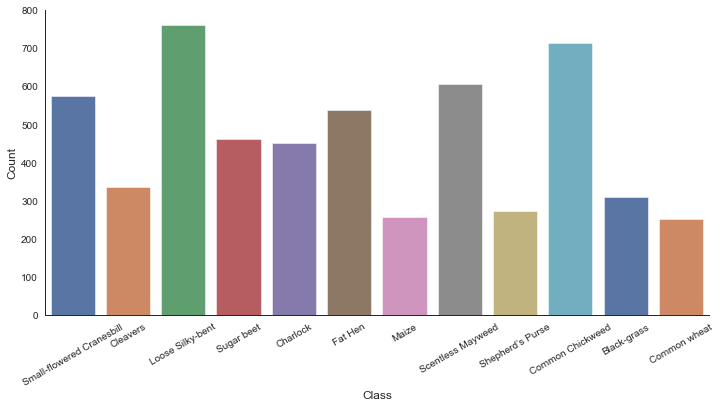

In [17]:
# Plot seedlings by class and count

seaborn = sns.FacetGrid(images_per_class_df, size=5, aspect=2)
seaborn.map(sns.barplot, 'Class', 'Count', palette='deep')
seaborn.set_xticklabels(rotation=30)
seaborn.add_legend()

Plot an `image grid` of `Small-flowered Cranesbill` plant seedlings

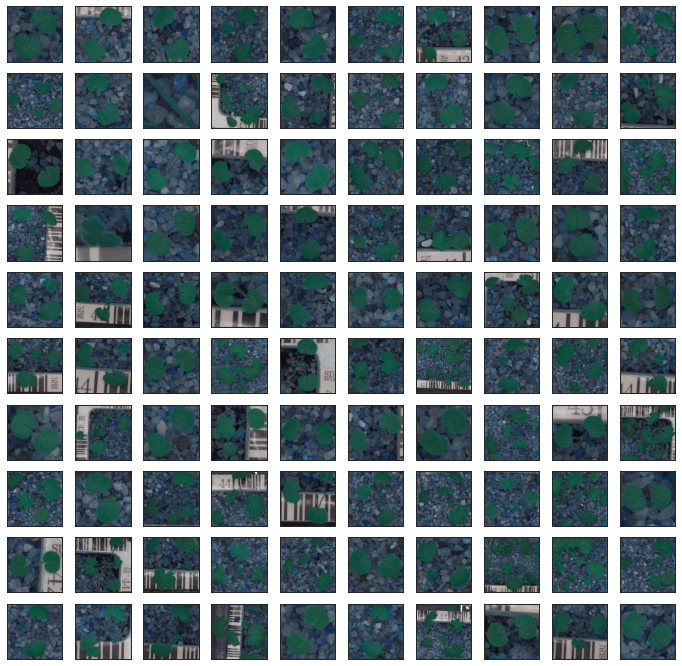

In [18]:
plot_for_class("Small-flowered Cranesbill", nb_rows=10, nb_cols=10)

Plot an `image grid` of `Maize` plant seedlings

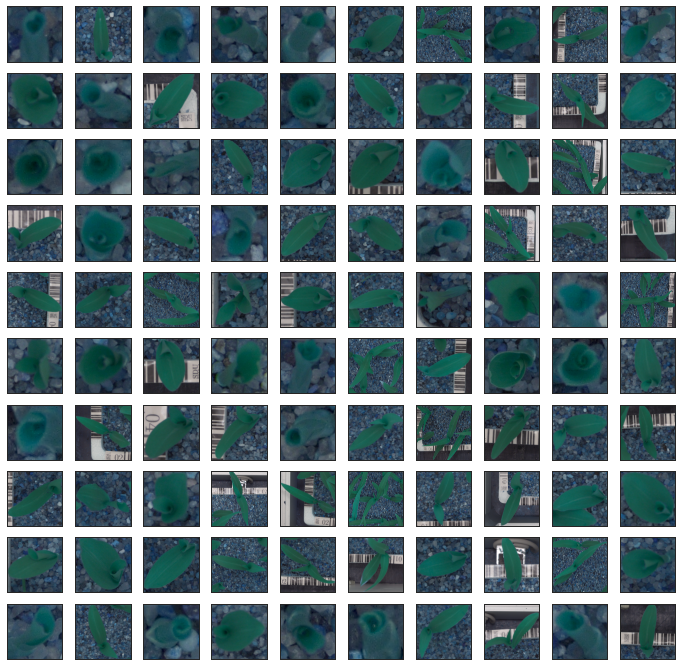

In [19]:
plot_for_class("Maize", nb_rows=10, nb_cols=10)

Plot an `image grid` of `All` seedling

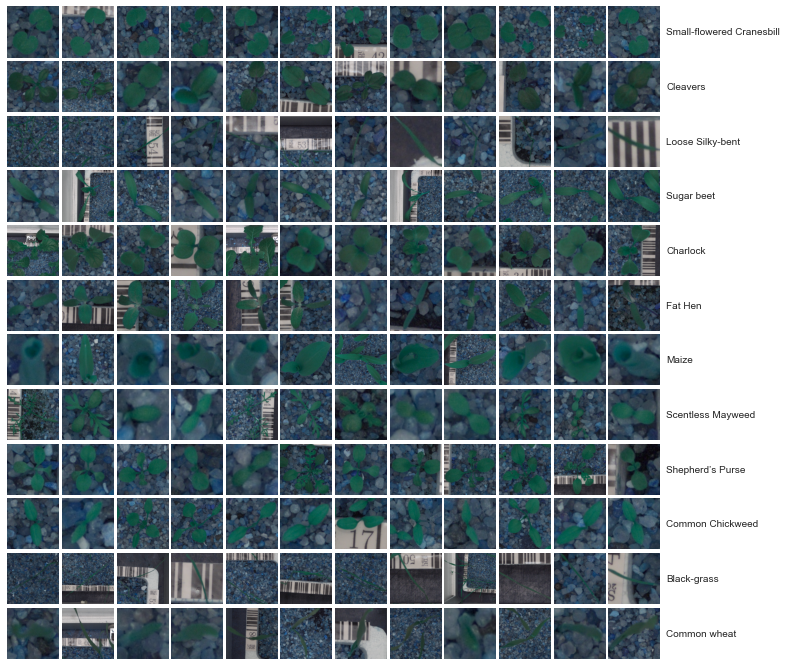

In [20]:
image_grid_plot_for_classes(list(images_per_class.keys()), nb_cols=12)

In [ ]:
grid_plot_for_class(list(images_per_class.keys()), nb_cols=12)

# 3. Data Preparation

After statistics analysis & visualizing the different aspects of images, we will `sanitize` or clean the training data for our model.

## 3.1 Sanitize Data

As we can see that each image has a background which makes contour of plant leaves obscure or unclear. Hence we will segregate background from foreground and hope it might help us achieve better accuracy.

For removing the background, we'll use the fact that all plant leaves are green and we can create a mask to remove background.

### Masking, Segmenting & Sharpening Green 

For creating mask, which will remove background, we need to convert BGR/RGB image to HSV. HSV is alternative of the BGR/RGB color model. In HSV, it is easier to represent a color range than in BGR/RGB color space.

Being a simple object detection problem, we will use the color of the object for background segregation. The HSV color-space is suitable for color detection because we can define a color with `Hue` and it's variations or spectrum using `Saturation` & `Value`. eg. Red, Darker Red, Lighter Red.

The following figure illustrates the HSV color space.

![alt text](https://www.mathworks.com/help/images/hsvcone.gif "HSV to RGB Color Space")

As hue varies from 0 to 1.0, the corresponding colors vary from red through yellow, green, cyan, blue, magenta, and back to red, so that there are actually red values both at 0 and 1.0. As saturation varies from 0 to 1.0, the corresponding colors (hues) vary from unsaturated (shades of gray) to fully saturated (no white component). As value, or brightness, varies from 0 to 1.0, the corresponding colors become increasingly brighter.

[HSV to RGB Color Space](https://www.mathworks.com/help/images/convert-from-hsv-to-rgb-color-space.html)

In [46]:
# Plot the plant images according to each class label


def plot_masked_image(images, nb_cols=4):

    # Generate figure, axes
    fig, axes = plt.subplots(
        nrows=len(images), ncols=nb_cols, figsize=(12, 12))

    # Iterating over different trials & parameters
    for index, image in enumerate(images):

        # Mask, Segment & Sharpen
        image_mask = create_mask_for_plant(image)
        image_segmented = segment_plant(image)
        image_sharpen = sharpen_image(image_segmented)

        # Show images
        axes[index, 0].imshow(image)
        axes[index, 1].imshow(image_mask)
        axes[index, 2].imshow(image_segmented)
        axes[index, 3].imshow(image_sharpen)

        # Set x, y tick labels
        axes[index, 0].xaxis.set_ticklabels([])
        axes[index, 0].yaxis.set_ticklabels([])
        axes[index, 1].xaxis.set_ticklabels([])
        axes[index, 1].yaxis.set_ticklabels([])
        axes[index, 2].xaxis.set_ticklabels([])
        axes[index, 2].yaxis.set_ticklabels([])
        axes[index, 3].xaxis.set_ticklabels([])
        axes[index, 3].yaxis.set_ticklabels([])

    plt.show()

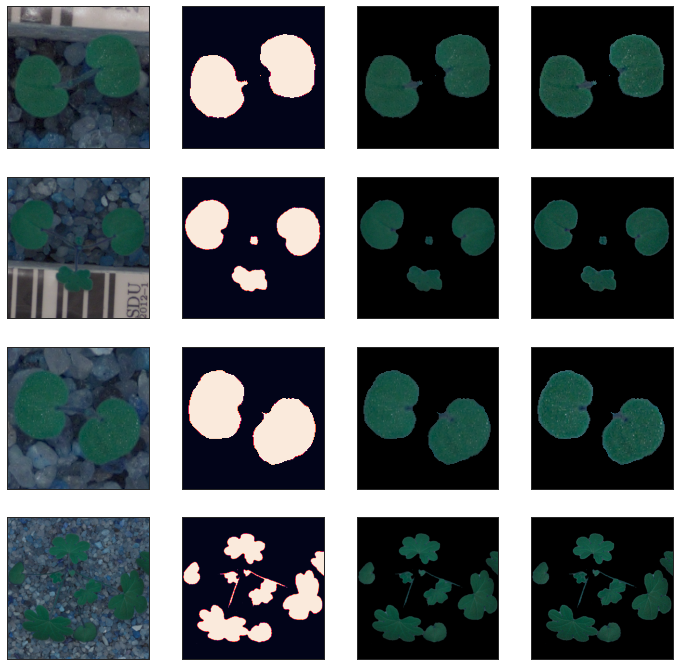

In [47]:
plot_masked_image(images_per_class["Small-flowered Cranesbill"][97:101])

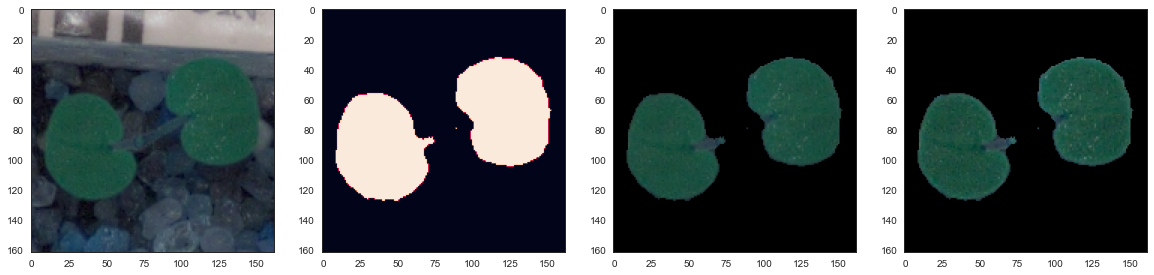

In [48]:
# Test image to see the changes

image = images_per_class["Small-flowered Cranesbill"][97]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpened = sharpen_image(image_segmented)

# Segment Mask & Sharpen for the plant using mark_segment_sharpen_image method
# image, image_mask, image_segmented, image_sharpened = mark_segment_sharpen_image(image, img_size=(150, 150))

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpened)

## 3.2 Categorize Class Labels

Let's create a dictionary and reverse dictionary containing mapping from label to id & vice-versa.

### First Approach: Using Simple dictionary with for loop

In [49]:
# Create a mapping from a flower class to an unique integer id & vice-versa

label_to_id_dict = {v: i for i, v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

# Covert train images label into id
label_ids = np.array([label_to_id_dict[x] for x in labels])

### Second Approach: Using LabelEncoder

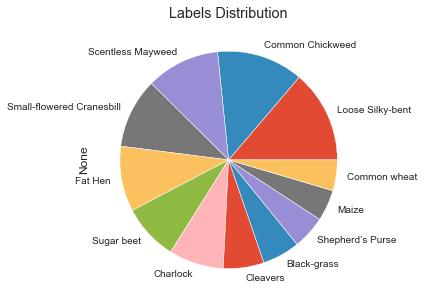



Classes:  ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherd’s Purse' 'Small-flowered Cranesbill' 'Sugar beet']

Number of One Hot encoded class labels:  12


In [50]:
# Plot of label types numbers
pd.Series(labels).value_counts().plot(
    kind='pie', title='Labels Distribution', figsize=(5, 5))
plt.show()

# Encode labels and create classes
le = LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)
print("\n\nClasses: ", le.classes_)

# Convert labels into categorical values
labels_onehot = to_categorical(labels_encoded)
print("\nNumber of One Hot encoded class labels: ", labels_onehot.shape[1])

# 4. Modelling

Now we are ready to train a model and predict. There are loads of predictive modelling algorithms to choose from. We must understand the type of problem and solution requirements to narrow down to a select few baseline models which we can evaluate iteratively.

Our problem falls in the supervised classification category. We want to identify the relationship between a seedling class and an input image.

With above two criteria - Supervised Learning plus Image Classification, we can narrow down our choice of models to a few which are as follow:

1. CNN
2. Transfer Learning using Xception, VGG, ImageNet
3. XGB using only countour features

## 4.1 CNN

The convolutional Neural Networks has the following strutctures.

* Input eg. (51x51x3)
1. First 64 filters
2. Second 64 filters
3. Third 128 filters
4. Fourth 128 filters
5. Fifth 256 filters
6. Sixth 256 filters
7. Seventh 256 filters
8. Eigth Dense layer 128 neurons
* Output 12 Seedling classes

Each pair of convolution layers have a max pooling layer and uses batch normalization to reduce overfitting. It also takes advantage of Leaky ReLUs. In dense layers, we will use dropout to reduce overfitting.

In the end, the fully-connected layers will be used for classification which the outputs probability distribution for each of 12 Seedling classes.

>Batch normalization is a technique to provide any layer in a neural network with inputs that are zero mean/unit variance. It is used to normalize the input layer by adjusting and scaling the activations.

>Leaky ReLUs allow a small, non-zero gradient when the unit is not active.

>Parametric ReLUs take this idea further by making the coefficient of leakage into a parameter that is learned along with the other neural network parameters.

### 4.1.1 Fixed Variables Initialization

In [9]:
BATCH_SIZE = 16
EPOCHS = 16
RANDOM_STATE = 21

# Same as label_to_id_dict

CLASS = {
    'Black-grass': 0,
    'Charlock': 1,
    'Cleavers': 2,
    'Common Chickweed': 3,
    'Common wheat': 4,
    'Fat Hen': 5,
    'Loose Silky-bent': 6,
    'Maize': 7,
    'Scentless Mayweed': 8,
    'Shepherds Purse': 9,
    'Small-flowered Cranesbill': 10,
    'Sugar beet': 11
}

# Same as id_to_label_dict

INV_CLASS = {
    0: 'Black-grass',
    1: 'Charlock',
    2: 'Cleavers',
    3: 'Common Chickweed',
    4: 'Common wheat',
    5: 'Fat Hen',
    6: 'Loose Silky-bent',
    7: 'Maize',
    8: 'Scentless Mayweed',
    9: 'Shepherds Purse',
    10: 'Small-flowered Cranesbill',
    11: 'Sugar beet'
}

### 4.1.2 Define Model Network

In [ ]:
# Define Model Neural Network


def model_neural_network():

    kernel_size = (3,3)
    pool_size= (2,2)
    first_filters = 32
    second_filters = 64
    third_filters = 128

    dropout_conv = 0.3
    dropout_dense = 0.3

    model = Sequential()
    model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                     input_shape = (img_size, img_size, 3)))
    model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
    model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = pool_size)) 
    model.add(Dropout(dropout_conv))

    model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
    model.add(MaxPooling2D(pool_size = pool_size))
    model.add(Dropout(dropout_conv))

    model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
    model.add(MaxPooling2D(pool_size = pool_size))
    model.add(Dropout(dropout_conv))

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(dropout_dense))
    model.add(Dense(12, activation = "softmax"))

    # The first 50 epochs with Adam opt & then 30 epochs with SGD opt.

    #mypotim = Adam(lr=2 * 1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    myopotim = Adam(lr=0.0001)
    mypotim = SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=mypotim,
        metrics=['accuracy'])
    model.summary()

    return model


# Model Callbacks

def get_callbacks(checkpoint_path, patience=5):

    if not os.path.exists('./logs'):
        os.makedirs('./logs')

    lr_reduced = ReduceLROnPlateau(
        monitor='val_acc',
        factor=0.1,
        patience=patience,
        verbose=1)
    
    earlystopper = EarlyStopping(monitor='loss', patience=10, verbose=1)

    checkpoint = ModelCheckpoint(
        checkpoint_path, monitor='val_acc', save_best_only=True, verbose=1)
    #early_stop = EarlyStopping(monitor='val_acc', patience=patience, mode='max')
    tensorboard = TensorBoard(
        log_dir='./logs',
        histogram_freq=2000,
        write_graph=True,
        write_images=True)

    return [lr_reduced, checkpoint, tensorboard]

### 4.1.3 Training CNN Model

In [ ]:
# Define Train method


def train(img, label, best_model=""):

    # Setting checkpoint & early stopping
    # Load the last best checkpoint files
    callbacks_list = get_callbacks(
        checkpoint_path=os.path.join(
            './checkpoint', 'model_weight_SGD.{epoch:02d}.hdf5'),
        patience=5)

    # Initialize the model neural networks architecture
    model = model_neural_network()

    best_model="-"
    # Load network weights
    if os.path.exists(os.path.join('./checkpoint', best_model)):
        print('Loading weights from previous run...', best_model)
        model.load_weights(filepath=os.path.join('./checkpoint', best_model))
    else:
        print('Weights of the Best model not loaded.')
        print('Training from scratch ...')

        # Split the data in train & validation set
        x_train, x_valid, y_train, y_valid = train_test_split(
            img,
            label,
            shuffle=True,
            train_size=0.7,
            stratify=label,
            random_state=RANDOM_STATE)

        # To avoide overfitting, we need to create an image generator which will randomly rotate, zoom, shift and flip image
        # during the fitting of the model.

        # Define an ImageDataGenerator
        train_gen = ImageDataGenerator(
    #         rescale=1.0/255
            rotation_range=360.,
            width_shift_range=0.3,
            height_shift_range=0.3,
            zoom_range=0.3,
            horizontal_flip=True,
            vertical_flip=True)

        val_gen = ImageDataGenerator(
    #         rescale=1.0/255
        )
            
        test_gen = ImageDataGenerator(
    #         rescale=1.0/255
            )

        # Fitting the model with the image generator & others
        model.fit(
            train_gen.flow(
                x_train, y_train, batch_size=BATCH_SIZE),
            steps_per_epoch=np.ceil(len(x_train) / BATCH_SIZE),
            epochs=EPOCHS,
            verbose=1,
            shuffle=True,
            validation_data=val_gen.flow(
                x_valid, y_valid, batch_size=BATCH_SIZE),
            validation_steps=np.ceil(len(x_valid) / BATCH_SIZE),
            callbacks=callbacks_list)

In [ ]:
# Training the model

def train_main():
    prepare_data = False
    if not prepare_data:
        try:
            train_dict = joblib.load(
                os.path.join('./save/pickles', 'train_dict.pickle'))
    #         test_dict = joblib.load(
    #             os.path.join('./save/pickles', 'test_dict.pickle'))
            print('Loading train & test dict...')
        except Exception as e:
            print('Stacktrace', e)
            print('Train & Test Dict does not exist.')
    
    else:
            train_dict = reader()
            # Dumping dicts
            joblib.dump(train_dict, os.path.join('./save/pickles', 'train_dict.pickle'))

    X_train = np.array(train_dict['image'])
    y_train = to_categorical(np.array([CLASS[str(l)] for l in train_dict['label']]))

#     best_model = 'model_weight_SGD.05-0.9526.hdf5'
    train(X_train, y_train, best_model="")


if __name__ == '__main__':
    train_main()

### 4.1.4 Evaluate Model

#### On Validation Set

Loading train & test dict...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 51, 51, 3)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 49, 49, 64)        1792      
_________________________________________________________________
batch_normalization_100 (Bat (None, 49, 49, 64)        256       
_________________________________________________________________
leaky_re_lu_78 (LeakyReLU)   (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
batch_normalization_101 (Bat (None, 47, 47, 64)        256       
_________________________________________________________________
leaky_re_lu_79 (LeakyReLU)   (None, 47, 47, 64)

Sugar beet  Cleavers  Scentless Mayweed  Fat Hen  \
Sugar beet                         70         0                  0        0   
Cleavers                            0       117                  0        0   
Scentless Mayweed                   0         0                 85        0   
Fat Hen                             0         0                  0      183   
Common Chickweed                    0         0                  0        0   
Loose Silky-bent                    0         0                  0        0   
Black-grass                         7         0                  0        0   
Charlock                            0         0                  0        0   
Maize                               0         0                  0        0   
Small-flowered Cranesbill           0         0                  0        0   
Common wheat                        0         0                  0        0   
Shepherds Purse                     0         0                  0        1   

                           Common Chickweed  Loose Silky-bent  Black-grass  \
Sugar beet                                0                 0            9   
Cleavers                                  0                 0            0   
Scentless Mayweed                         0                 0            1   
Fat Hen                                   0                 0            0   
Common Chickweed                         66                 0            0   
Loose Silky-bent                          0               143            0   
Black-grass                               0                 0          189   
Charlock                                  0                 0            0   
Maize                                     0                 0            0   
Small-flowered Cranesbill                 0                 0            0   
Common wheat                              0                 0            0   
Shepherds Purse                           0                 0            0   

                           Charlock  Maize  Small-flowered Cranesbill  \
Sugar beet                        0      0                          0   
Cleavers                          0      0                          0   
Scentless Mayweed                 0      0                          0   
Fat Hen                           0      0                          0   
Common Chickweed                  0      0                          0   
Loose Silky-bent                  0      0                          0   
Black-grass                       0      0                          0   
Charlock                         66      0                          0   
Maize                             0    155                          0   
Small-flowered Cranesbill         0      0                         69   
Common wheat                      0      0                          0   
Shepherds Purse                   0      0                          0   

                           Common wheat  Shepherds Purse  
Sugar beet                            0                0  
Cleavers                              0                0  
Scentless Mayweed                     0                0  
Fat Hen                               0                0  
Common Chickweed                      0                0  
Loose Silky-bent                      0                0  
Black-grass                           0                0  
Charlock                              0                0  
Maize                                 0                0  
Small-flowered Cranesbill             0                0  
Common wheat                        149                0  
Shepherds Purse                       0              115



Saving Confusion Matrices in the ./save/con_matrix directory


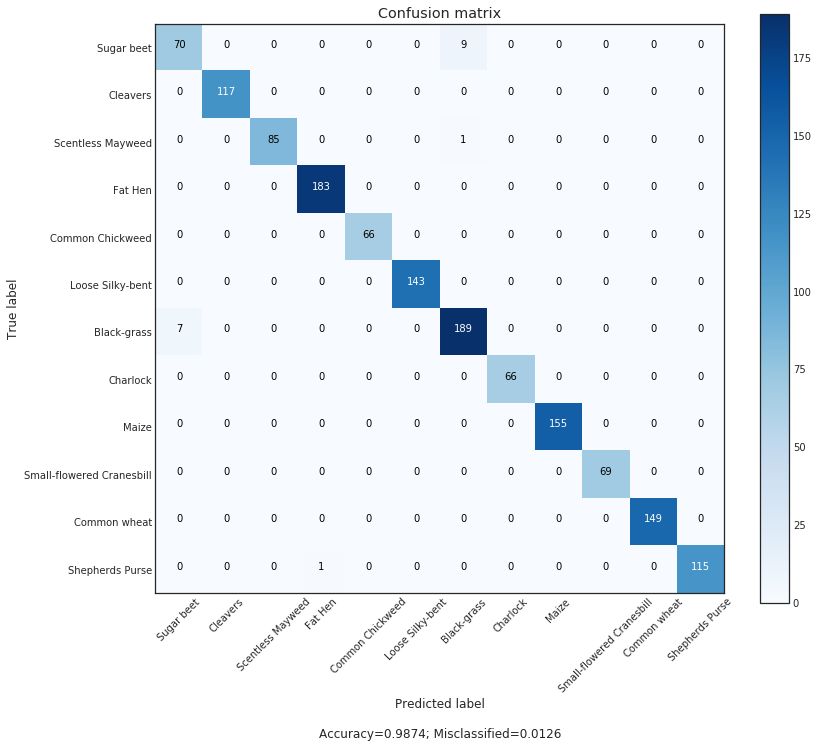



Classification Report
                           precision    recall  f1-score   support

               Sugar beet       0.91      0.89      0.90        79
                 Cleavers       1.00      1.00      1.00       117
        Scentless Mayweed       1.00      0.99      0.99        86
                  Fat Hen       0.99      1.00      1.00       183
         Common Chickweed       1.00      1.00      1.00        66
         Loose Silky-bent       1.00      1.00      1.00       143
              Black-grass       0.95      0.96      0.96       196
                 Charlock       1.00      1.00      1.00        66
                    Maize       1.00      1.00      1.00       155
Small-flowered Cranesbill       1.00      1.00      1.00        69
             Common wheat       1.00      1.00      1.00       149
          Shepherds Purse       1.00      0.99      1.00       116

              avg / total       0.99      0.99      0.99      1425



In [24]:
# Define Test method


def test_valid(X_train, x_valid, y_train, y_valid, best_model):

    # Initialize the model neural networks architecture & load weights
    model = model_neural_network()
    model.load_weights(filepath=os.path.join("./checkpoint", best_model))

    # Evaluate on train and valid set
    print("\nCalculating Train Set accuracy ...")
    train_acc = model.evaluate(
        X_train, to_categorical(np.array([CLASS[l] for l in y_train]))
    )
    print(
        "Train Set accuracy: {}%".format([np.round(acc * 100, 2) for acc in train_acc])
    )

    print("\nCalculating Valid Set accuracy ...")
    valid_acc = model.evaluate(
        x_valid, to_categorical(np.array([CLASS[l] for l in y_valid]))
    )
    print(
        "Valid Set accuracy: {}%".format([np.round(acc * 100, 2) for acc in valid_acc])
    )

    print("\nCalculating Confusion Matrix & Classification Report ...")
    # Predictions on the valid set
    prob = model.predict(x_valid, verbose=1)
    predictions = prob.argmax(axis=1)

    # True class label
    true = np.array([CLASS[l] for l in y_valid])

    # Confusion matrix on the valid set.
    con_matrix = confusion_matrix(true, predictions)

    print("\n\nConfusion matrix of the Seedlings Valid set\n\n")
    display(
        pd.DataFrame(con_matrix, columns=list(CLASS.keys()), index=list(CLASS.keys()))
    )

    # Plot the confusion matrix
    plot_confusion_matrix(
        con_matrix,
        target_names=list(CLASS.keys()),
        plt_name="Seedlings_Con_Matrix",
        rootdir="./",
        save_dir="save/con_matrix",
        title="Confusion matrix",
        cmap=plt.cm.Blues,
        normalize=False,
    )

    print("\n\nClassification Report")
    print(classification_report(true, predictions, target_names=list(CLASS.keys())))


# Testing the model on validation set


def valid_main():

    try:
        train_dict = joblib.load(os.path.join("./save/pickles", "train_dict.pickle"))
        #         test_dict = joblib.load(
        #             os.path.join('./save/pickles', 'test_dict.pickle'))
        print("Loading train & test dict...")
    except Exception as e:
        print("Stacktrace", e)
        print("Train & Test Dict does not exist.")

    if not train_dict:
        train_dict = reader()
        # Dumping dicts
        joblib.dump(train_dict, os.path.join("./save/pickles", "train_dict.pickle"))
    #         joblib.dump(test_dict,
    #                     os.path.join('./save/pickles', 'test_dict.pickle'))

    img = np.array(train_dict["image"])
    label = train_dict["label"]

    # Split the data in train & validation set
    X_train, x_valid, y_train, y_valid = train_test_split(
        img,
        label,
        shuffle=True,
        train_size=0.7,
        stratify=target,
        random_state=RANDOM_STATE,
    )

    # best_model = input('Enter the name of best model saved in ./logs dir: ')
    best_model = "model_weight_SGD.12-0.9832.hdf5"
    test_valid(X_train, x_valid, y_train, y_valid, best_model)


if __name__ == "__main__":
    valid_main()

#### Submission on Test Set 

In [9]:
# Define Test method


def test(img, label, best_model):

    # Initialize the model neural networks architecture & load weights
    model = model_neural_network()
    model.load_weights(filepath=os.path.join('./checkpoint', best_model))

    # Predictions
    prob = model.predict(img, verbose=1)
    pred = prob.argmax(axis=-1)

    submission_df = pd.DataFrame({
        "file": label,
        "species": [INV_CLASS[p] for p in pred]
    })
    submission_df.to_csv(
        os.path.join('./save', 'submission.csv'), index=False, header=True)


# Testing the model


def test_main():

    try:
        test_dict = joblib.load(
            os.path.join('./save/pickles', 'test_dict.pickle'))
        print('Loading dict...')
    except Exception as e:
        print('Stacktrace', e)
        print('Test Dict does not exist.')

    if not test_dict:
        _, test_dict = reader()

    X_test = np.array(test_dict['image'])
    label = test_dict['label']

    best_model = input('Enter the name of best model saved in ./logs dir: ')
    test(X_test, label, best_model)


if __name__ == '__main__':
    test_main()

Loading dict...


Enter the name of best model saved in ./logs dir:  model_weight_SGD.12-0.9832.hdf5


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 51, 51, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 49, 49, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 47, 47, 64)        0         
__________

## 4.2 Transfer Learning using Xception

Use Keras Pretrained Models

In [12]:
%ls ../../models/keras-pretrained-models

imagenet_class_index.json
inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5
inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5
inception_v3_weights_tf_dim_ordering_tf_kernels.h5
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Kuszma.JPG
resnet50_weights_tf_dim_ordering_tf_kernels.h5
resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
xception_weights_tf_dim_ordering_tf_kernels.h5
xception_weights_tf_dim_ordering_tf_kernels_notop.h5


#### Helper Functions to load Seedlings data

In [102]:
# Load test seedlings data & return images, labels, image_per_class


def load_seedlings_transfer(path=os.path.join(root_dir, 'train'),
                            img_size=(299, 299)):
    images = []
    labels = []
    images_per_class = defaultdict(list)

    for class_folder_name in os.listdir(path):
        class_folder_path = os.path.join(path, class_folder_name)

        for image_path in glob(os.path.join(class_folder_path, "*.png")):
            # Read an image
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)

            # Stats for each seedlings class
            images_per_class[class_folder_name].append(image)

            # Resize image to img_size pixels
            image = cv2.resize(image, img_size, interpolation=cv2.INTER_AREA)

            images.append(image)
            labels.append(class_folder_name)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, images_per_class


# Load test seedlings data & return images, ids


def load_seedlings_transfer_test(path=os.path.join(root_dir, 'test'),
                                 img_size=(299, 299)):
    images = []
    ids = []

    for image_path in glob(os.path.join(path, "*.png")):
        # Read an image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        # Resize image to img_size pixels
        image = cv2.resize(image, img_size, interpolation=cv2.INTER_AREA)

        images.append(image)
        ids.append(os.path.basename(image_path))

    images = np.array(images)
    ids = np.array(ids)

    return images, ids

In [79]:
ls data/all/

sample_submission.csv  test/  test.zip  train/  train.zip


### 4.2.1 Xception Model

#### 4.2.1.1 Prepare & Load Data

The `Xception` model `input` dimesions are `299 * 299 * 3`. Hence we need to prepare images satisfying the dimensional requirements.

In [7]:
# Constants

input_dim = 299
POOLING = 'avg'
RANDOM_STATE = 21

In [9]:
images_xception = np.array([])

try:
    print('Loading Images & Labels dict ...')
    images_xception = joblib.load(os.path.join(
        './save/pickles', 'images-xception.pickle'))
    labels = joblib.load(os.path.join(
        './save/pickles', 'labels-xception.pickle'))
    print('Loading done.')
except Exception as e:
    print('Stacktrace', e)
    print('Images & Labels dict does not exist.')

if not (images_xception.size):
    img_size = (299, 299)
    print('Running load_seedlings method with img_size {} ...'.format(img_size))
    images_xception, labels, images_per_class = load_seedlings_transfer(
        img_size=img_size)

    print('Dumping Images & Labels dict ...')
    # Dumping dicts
    joblib.dump(images_xception, os.path.join(
        './save/pickles', 'images-xception.pickle'))
    joblib.dump(labels, os.path.join(
        './save/pickles', 'labels-xception.pickle'))
    print('Images & Labels dict dumping done.')

Loading Images, Labels & images_per_class dict ...
Loading done.


In [11]:
# Type cast int to float for Xception model compatibility

images_xception = images_xception.astype(dtype='float32', copy=False)

print('Images Shape:', images_xception.shape)
print('Image Data Type:', images_xception[0].dtype)
print('Labels Shape:', labels.shape)
print('Label Data Type:', labels[0].dtype)

Images Shape: (4750, 299, 299, 3)
Image Data Type: float32
Labels Shape: (4750,)
Label Data Type: <U10


#### 4.2.1.2 Extract Xception Bottleneck Features

In [12]:
%time

# Numpy array to store extracted features from Xception model
images_xception_features = np.zeros(
    (len(images_xception), input_dim, input_dim, 3), dtype='float32')

# Extract features with Xception model
for i, image in tqdm(enumerate(images_xception)):
    x = xception.preprocess_input(np.expand_dims(image, axis=0))
    images_xception_features[i] = x

print('Train Images shape: {} size: {:,}'.format(
    images_xception_features.shape, images_xception_features.size))

print('Dumping images_xception_features ...')
joblib.dump(images_xception_features, os.path.join(
    './save/pickles', 'images_xception_features.pickle'))
print('images_xception_features dumping done.')

126it [00:00, 1254.04it/s]

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs


4750it [00:02, 1652.94it/s]

Train Images shape: (4750, 299, 299, 3) size: 1,273,964,250


In [8]:
del images_xception_features, labels

In [49]:
try:
    print('Loading images_xception_features & Labels ...')
    images_xception_features = joblib.load(os.path.join(
        './save/pickles', 'images_xception_features.pickle'))
    labels = joblib.load(os.path.join(
        './save/pickles', 'labels-xception.pickle'))
    print('Loading done.')
except Exception as e:
    print('Stacktrace', e)
    print('images_xception_features & Labels does not exist.')


# Split the data in train & validation set
x_train, x_valid, y_train, y_valid = train_test_split(
    images_xception_features,
    labels,
    shuffle=True,
    train_size=0.8,
    stratify=labels,
    random_state=RANDOM_STATE
)

del images_xception_features, labels

# Xception V1 model, with weights pre-trained on ImageNet. On ImageNet, this model gets to
# a top-1 validation accuracy of 0.790 and a top-5 validation accuracy of 0.945. Note that this
# model only supports the data format 'channels_last' (height, width, channels).
# The default input size for this model is 299x299.

xception_bottleneck = xception.Xception(
    weights='imagenet', include_top=False, pooling=POOLING)

# Calculating Xception train & valid set bottleneck features
x_train_botf = xception_bottleneck.predict(x_train, batch_size=32, verbose=1)
x_valid_botf = xception_bottleneck.predict(x_valid, batch_size=32, verbose=1)

print('Xception train bottleneck features shape: {} size: {:,}'.format(
    x_train_botf.shape, x_train_botf.size))
print('Xception valid bottleneck features shape: {} size: {:,}'.format(
    x_valid_botf.shape, x_valid_botf.size))

# Dumping Xception train & valid set bottleneck features
joblib.dump(x_train_botf, os.path.join(
    './save/pickles', 'x_train_botf.pickle'))
joblib.dump(x_valid_botf, os.path.join(
    './save/pickles', 'x_valid_botf.pickle'))

joblib.dump(y_train, os.path.join('./save/pickles', 'y_train_botf.pickle'))
joblib.dump(y_valid, os.path.join('./save/pickles', 'y_valid_botf.pickle'))
print('Dumping Xception train & valid set bottleneck features & labels done.')

Loading images_xception_features & Labels ...
Loading done.
950/950 [==============================] - 443s 467ms/step
Xception train bottleneck features shape: (3800, 2048) size: 7,782,400
Xception valid bottleneck features shape: (950, 2048) size: 1,945,600
Dumping Xception train & valid set bottleneck features done.


#### 4.2.1.3 Logistic Regression on Xception Bottleneck Features

In [15]:
# Logistic Regression classifier

logreg = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', random_state=RANDOM_STATE)
logreg.fit(x_train_botf, y_train)

valid_probs = logreg.predict_proba(x_valid_botf)
valid_preds = logreg.predict(x_valid_botf)

In [19]:
print('Logistic Regression model Accuracy on valid set using Xception Bottleneck Features: {}%'.format(
    np.round(accuracy_score(y_valid, valid_preds)*100, 2)))

Logistic Regression model Accuracy on valid set using Xception Bottleneck Features: 87.26%


**Confusion Matrix**

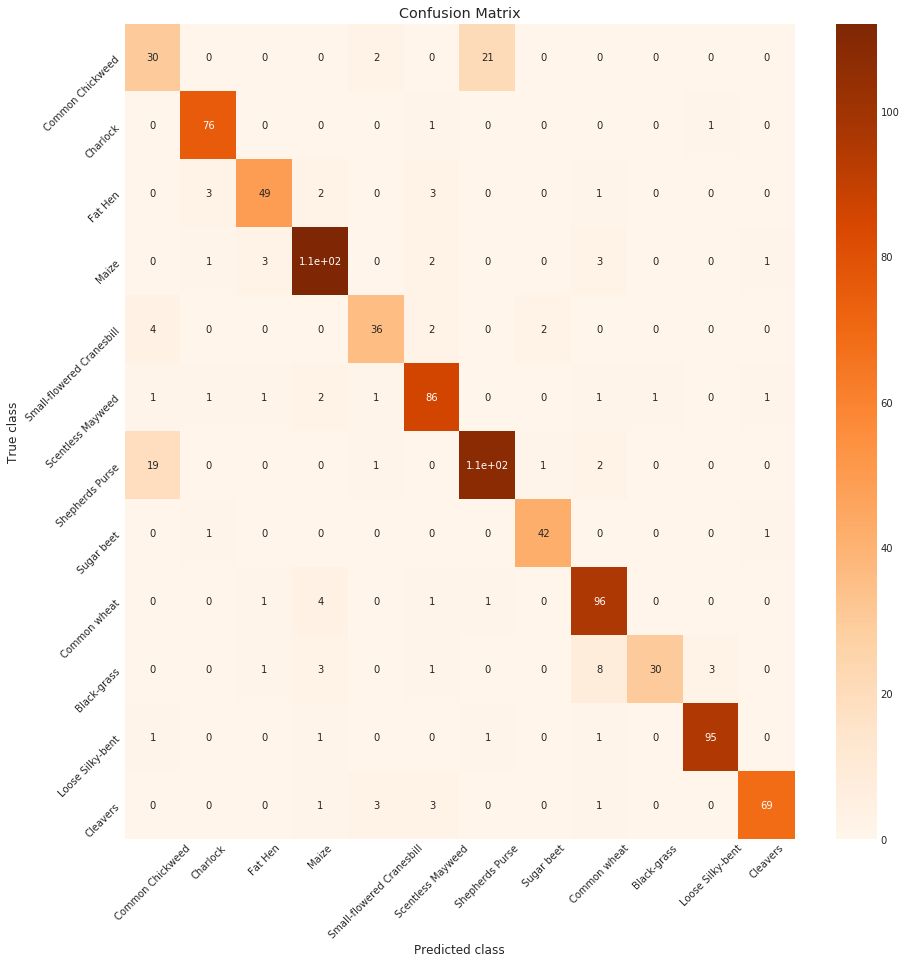

In [22]:
con_matrix = confusion_matrix(y_valid, valid_preds)

# Plot confusion matrix using seaborn heatmap

fig, ax = plt.subplots(1, figsize=(15, 15))

ax = sns.heatmap(con_matrix, ax=ax, cmap=plt.cm.Oranges, annot=True)

ax.set_xticklabels(list(CLASS.keys()), rotation=45)
ax.set_yticklabels(list(CLASS.keys()), rotation=45)

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')

fig.savefig(os.path.join('./save/con_matrix',
                         'Seedlings_logreg_Confusion_Matrix.png'), dpi=300)
plt.show()

#### 4.2.1.4 Classifier Comparison

After fitting our train dataset on `Xception Bottleneck Features`, you can run a general Classifier Comparison module containing sklearn classifers with vanilla configurations.

In [29]:
% % time


def classifier_comparison(n_splits=3):
    # Classifier names & initializations
    names = ["Nearest Neighbors", "SVM", "Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "GradientBoost"
             "Naive Bayes", "LDA", "QDA", "XGB Classifier"]

    classifiers = [
        KNeighborsClassifier(3),
        SVC(probability=True),
        GaussianProcessClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        MLPClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        XGBClassifier()]

    # Split & shuffle data using Stratified K Fold
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=21)

    # Calculate accuracy over all splits, classifiers
    count = 0
    acc_dict = defaultdict(list)
    for train_index, test_index in kfold.split(x_train_botf, y_train):
        xtrain, ytrain = x_train_botf[train_index], y_train[train_index]
        xtest, ytest = x_train_botf[test_index], y_train[test_index]
        print('Iteration: ', count)

        # iterate over classifiers
        for clf in classifiers:
            clf_name = clf.__class__.__name__
            clf.fit(xtrain, ytrain)
            predictions = clf.predict(xtest)
            accuracy = accuracy_score(ytest, predictions)

            # Append results in default dict of lists
            acc_dict[clf_name].append(accuracy)

        count += 1

    return acc_dict


# Call the classifier_comparison module & save the results
acc_dict = classifier_comparison(n_splits=3)

Iteration:  0


/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Var

Iteration:  1


/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWa

Iteration:  2


/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWa

CPU times: user 55min 50s, sys: 6min 1s, total: 1h 1min 52s
Wall time: 50min 47s


/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
# Dataframe containing classifier name & accuracy score
acc_df = pd.DataFrame.from_dict(acc_dict, orient='index')
acc_df = acc_df.rename(
    columns={0: '1st Iteration', 1: '2nd Iteration', 2: '3rd Iteration'})

# Calculate average accuracy
acc_df['avg_acc'] = acc_df.mean(axis=1)
acc_df = (acc_df*100).round(2)

sorted_acc_df = acc_df.sort_values(by='avg_acc', ascending=False)
display(sorted_acc_df)

1st Iteration  2nd Iteration  3rd Iteration  \
MLPClassifier                          86.14          87.29          85.27   
XGBClassifier                          77.17          79.48          78.78   
GradientBoostingClassifier             76.30          77.74          77.04   
GaussianProcessClassifier              74.57          77.43          74.58   
KNeighborsClassifier                   73.31          75.22          73.40   
LinearDiscriminantAnalysis             65.20          68.98          65.32   
RandomForestClassifier                 60.79          61.33          61.92   
SVC                                    59.53          61.09          60.49   
GaussianNB                             51.50          54.70          56.53   
DecisionTreeClassifier                 48.43          48.38          48.54   
AdaBoostClassifier                     33.86          35.91          43.63   
QuadraticDiscriminantAnalysis          13.23          13.50          12.51   

                               avg_acc  
MLPClassifier                    86.24  
XGBClassifier                    78.48  
GradientBoostingClassifier       77.03  
GaussianProcessClassifier        75.53  
KNeighborsClassifier             73.97  
LinearDiscriminantAnalysis       66.50  
RandomForestClassifier           61.34  
SVC                              60.37  
GaussianNB                       54.24  
DecisionTreeClassifier           48.45  
AdaBoostClassifier               37.80  
QuadraticDiscriminantAnalysis    13.08

Text(0.5,1,'Classifier Comparison based on Accuracy')

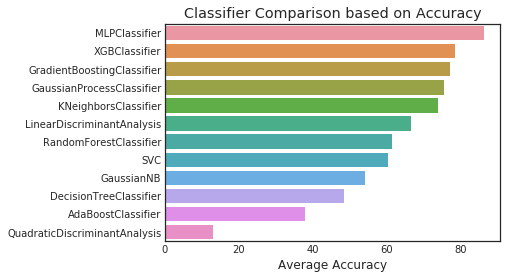

In [34]:
# Plot a barplot containing classifier name & accuracy score

sns.barplot(x='avg_acc', y=sorted_acc_df.index, data=sorted_acc_df)
plt.xlabel('Average Accuracy')
plt.title('Classifier Comparison based on Accuracy')

It seems like simple neural network `MLP` performs much `better` than others. Hence we can train a full blown `Fully Connected networks` in keras.

#### 4.2.1.5 Training a Keras Dense Model

In [9]:
# Dumping Xception train & valid set bottleneck features

x_train_botf = joblib.load(os.path.join(
    './save/pickles', 'x_train_botf.pickle'))
x_valid_botf = joblib.load(os.path.join(
    './save/pickles', 'x_valid_botf.pickle'))

y_train_botf = joblib.load(os.path.join(
    './save/pickles', 'y_train_botf.pickle'))
y_valid_botf = joblib.load(os.path.join(
    './save/pickles', 'y_valid_botf.pickle'))
print('Loading Xception train & valid set bottleneck features & labels done.')

Loading Xception train & valid set bottleneck features & labels done.


In [ ]:
% % time

BATCH_SIZE = 16
EPOCHS = 500
RANDOM_STATE = 21
# Fixing random seed
np.random.seed(RANDOM_STATE)

# Reduce LR On Plateau
lr_reduced = ReduceLROnPlateau(
    monitor='val_acc', factor=0.1, epsilon=1e-5, patience=5, verbose=1)

# Setting checkpoint & early stopping
checkpoint_path = './checkpoint/Xception_ADAM_best_weights.{epoch:02d}-{acc:.4f}.hdf5'
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# TensorBoard logs
tensorboard = TensorBoard(log_dir='./logs{}'.format(time()),
                          histogram_freq=2000, write_graph=True, write_images=True)

# Early Stopping
# early_stop = EarlyStopping(monitor='val_acc', patience=5, mode='max')

# All callbacks
callbacks_list = [lr_reduced, checkpoint, tensorboard]


# Model Neural Network Architecture
inputs = Input(shape=(2048,))

# Adding 1st Fully connected, output layer & Dropout
fc = Dense(input_shape=(2048,), units=2048, activation='relu')(inputs)
fc = Dropout(0.5)(fc)

# Adding 2nd Fully connected, output layer & Dropout
fc = Dense(input_shape=(1024,), units=1024, activation='relu')(fc)
fc = Dropout(0.4)(fc)

# Adding 3rd Fully connected, output layer & Dropout
fc = Dense(input_shape=(512,), units=512, activation='relu')(fc)
fc = Dropout(0.3)(fc)

# Adding 4th Fully connected, output layer & Dropout
fc = Dense(input_shape=(256,), units=256, activation='relu')(fc)
fc = Dropout(0.2)(fc)

# Adding 5th Fully connected, output layer & Dropout
fc = Dense(input_shape=(128,), units=128, activation='relu')(fc)
fc = Dropout(0.1)(fc)

# Adding output layer
outputs = Dense(units=12, activation='softmax')(fc)

model = Model(inputs=inputs, outputs=outputs)

best_model = 'Xception_ADAM_best_weights.41-0.9428.hdf5'
# Load network weights
if os.path.exists(os.path.join('./checkpoint', best_model)):
    print('Loading weights from previous run...', best_model)
    model.load_weights(filepath=os.path.join('./checkpoint', best_model))
else:
    print('Weights not loaded.', best_model)


mypotim = Adam(lr=2 * 1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# mypotim = SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=mypotim,
              metrics=['accuracy'])
# Model Summary
model.summary()

# Convert categorical labels into one-hot vector
y_train_botf = to_categorical(np.array([CLASS[l] for l in y_train_botf]))

print('The Best Model will be saved in the following dir ', checkpoint_path)
print('Training of the model with Xception bottleneck features as inputs starts now ...')

# Fit the model
model.fit(x_train_botf, y_train_botf, validation_split=0.3, batch_size=BATCH_SIZE,
          epochs=EPOCHS, verbose=1, shuffle=True, callbacks=callbacks_list)

Loading weights from previous run... Xception_ADAM_best_weights.41-0.9428.hdf5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_______________________________________________________________

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2660/2660 [==============================] - 2s 921us/step - loss: 0.5263 - acc: 0.8481 - val_loss: 0.5666 - val_acc: 0.8553

Epoch 00201: ReduceLROnPlateau reducing learning rate to 1.9996529085915142e-43.

Epoch 00201: val_acc did not improve from 0.85789
Epoch 202/500
2660/2660 [==============================] - 2s 911us/step - loss: 0.5118 - acc: 0.8556 - val_loss: 0.5666 - val_acc: 0.8553

Epoch 00202: val_acc did not improve from 0.85789
Epoch 203/500
2660/2660 [==============================] - 2s 910us/step - loss: 0.5742 - acc: 0.8523 - val_loss: 0.5666 - val_acc: 0.8553

Epoch 00203: val_acc did not improve from 0.85789
Epoch 204/500
2660/2660 [==============================] - 2s 909us/step - loss: 0.5323 - acc: 0.8485 - val_loss: 0.5666 - val_acc: 0.8553

Epoch 00204: val_acc did not improve from 0.85789
Epoch 205/500
2660/2660 [==============================] - 2s 910us/step - loss: 0.5631 - acc: 0.8402 - val_loss: 0.5666 - val_acc: 0.8553

Epoch 00205: val_acc did not imp

## 4.3 XGB

### Prepare & Load Data

In [164]:
display(features_df.head())

area  height     label  largest_contour_area  no_of_countours  width
0  24198.5     360  Cleavers               12418.0                3    360
1   8176.0     149  Cleavers                8176.0                1    149
2  12717.0     225  Cleavers               12717.0                1    225
3  35139.0     404  Cleavers               21444.0                5    404
4  20688.0     315  Cleavers                9436.0               12    315

In [167]:
# Select the numeric features, drop NA values

x_train_features =` features_df.loc[:, [
    'height', 'width', 'largest_contour_area', 'label']]
x_train_features['area_per_contour'] = features_df.loc[:,
                                                       'area'] / features_df.loc[:, 'no_of_countours']

print('Displaying Null rows/columns ...')
display(x_train_features[x_train_features.isnull().any(axis=1)])

x_train_features.dropna(inplace=True)
x_train_features.reset_index(drop=True, inplace=True)

# Pop out labels

labels = x_train_features.pop('label')

# Scale using MinMaxScaler

x_train_features_scaled = MinMaxScaler().fit_transform(x_train_features)
x_train_features.loc[:] = x_train_features_scaled

print('\nTop 10 rows')
x_train_features.head()

Displaying Null rows/columns ...


height  width  largest_contour_area             label  area_per_contour
1769     131    131                   0.0  Loose Silky-bent               NaN
2381     114    114                   0.0      Common wheat               NaN
3951      91     91                   0.0       Black-grass               NaN
4592      63     63                   0.0  Common Chickweed               NaN


Top 10 rows


height     width  largest_contour_area  area_per_contour
0  0.091256  0.078894              0.005999          0.016947
1  0.029343  0.025368              0.003949          0.017178
2  0.051643  0.044647              0.006143          0.026718
3  0.104167  0.090056              0.010360          0.014765
4  0.078052  0.067478              0.004558          0.003622

### Encode labels using LabelEncoder

In [168]:
# Encode labels and create classes

le = LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)
print("\n\nClasses: ", le.classes_)

# Convert labels into categorical values
labels_onehot = to_categorical(labels_encoded)
print("\nNumber of One Hot encoded class labels: ", labels_onehot.shape[1])



Classes:  ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']

Number of One Hot encoded class labels:  12


### Classifier Comparison

In [169]:
% % time

x_train_features = np.array(x_train_features)
labels_encoded = np.array(labels_encoded)


def classifier_comparison(n_splits=3):
    # Classifier names & initializations
    names = ["Nearest Neighbors", "SVM", "Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "GradientBoost"
             "Naive Bayes", "LDA", "QDA", "XGB Classifier"]

    classifiers = [
        KNeighborsClassifier(3),
        SVC(probability=True),
        GaussianProcessClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        MLPClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        XGBClassifier()]

    # Split & shuffle data using Stratified K Fold
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=21)

    # Calculate accuracy over all splits, classifiers
    count = 0
    acc_dict = defaultdict(list)
    for train_index, test_index in kfold.split(x_train_features, labels_encoded):
        xtrain, ytrain = x_train_features[train_index], labels_encoded[train_index]
        xtest, ytest = x_train_features[test_index], labels_encoded[test_index]
        print('Iteration: ', count)

        # iterate over classifiers
        for clf in classifiers:
            clf_name = clf.__class__.__name__
            clf.fit(xtrain, ytrain)
            predictions = clf.predict(xtest)
            accuracy = accuracy_score(ytest, predictions)

            # Append results in default dict of lists
            acc_dict[clf_name].append(accuracy)

        count += 1

    return acc_dict


# Call the classifier_comparison module & save the results
acc_dict = classifier_comparison(n_splits=3)

Iteration:  0
Iteration:  1
Iteration:  2
CPU times: user 8min 42s, sys: 5min 57s, total: 14min 40s
Wall time: 4min 56s


In [170]:
# Dataframe containing classifier name & accuracy score
acc_df = pd.DataFrame.from_dict(acc_dict, orient='index')
acc_df = acc_df.rename(
    columns={0: '1st Iteration', 1: '2nd Iteration', 2: '3rd Iteration'})

# Calculate average accuracy
acc_df['avg_acc'] = acc_df.mean(axis=1)
acc_df = (acc_df*100).round(2)

sorted_acc_df = acc_df.sort_values(by='avg_acc', ascending=False)
display(sorted_acc_df)

1st Iteration  2nd Iteration  3rd Iteration  \
XGBClassifier                          47.64          48.45          47.78   
GradientBoostingClassifier             47.76          48.64          47.21   
RandomForestClassifier                 44.93          44.97          45.18   
KNeighborsClassifier                   40.33          42.00          39.23   
DecisionTreeClassifier                 40.64          40.10          39.42   
MLPClassifier                          37.49          35.67          36.69   
AdaBoostClassifier                     17.64          23.66          26.68   
LinearDiscriminantAnalysis             22.56          23.85          21.23   
GaussianNB                             20.48          23.28          21.55   
GaussianProcessClassifier              20.86          20.94          19.07   
QuadraticDiscriminantAnalysis          19.41          14.10          19.07   
SVC                                    17.01          17.90          17.43   

                               avg_acc  
XGBClassifier                    47.96  
GradientBoostingClassifier       47.87  
RandomForestClassifier           45.03  
KNeighborsClassifier             40.52  
DecisionTreeClassifier           40.05  
MLPClassifier                    36.62  
AdaBoostClassifier               22.66  
LinearDiscriminantAnalysis       22.54  
GaussianNB                       21.77  
GaussianProcessClassifier        20.29  
QuadraticDiscriminantAnalysis    17.53  
SVC                              17.45

Text(0.5,1,'Classifier Comparison based on Accuracy')

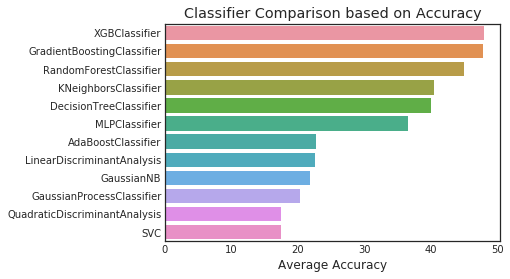

In [171]:
# Plot a barplot containing classifier name & accuracy score

sns.barplot(x='avg_acc', y=sorted_acc_df.index, data=sorted_acc_df)
plt.xlabel('Average Accuracy')
plt.title('Classifier Comparison based on Accuracy')

It seems like simple `XGB` performs much `better` than others but accuracy is very less in comparison to a full blown `CNN networks`.

# 5. Deployment

#### Convert the model from Keras to Tensorflowjs
This conversion needs to be done so that the model can be loaded into the web app.

In [ ]:
!pip install tensorflowjs

In [ ]:
# Use the command line conversion tool to convert the model

!tensorflowjs_converter --input_format keras model.h5 tfjs_model/model

# 6. Further Improvements

It's now time for you to get your hands even dirtier and go at it all by yourself in a `challenge`! 

1. Try to use the creative data preprocessing steps, promising models, ensemble of them, different algorithms and compare their result
    * Experiment with stacking different input features in different ways (combinations) to understand their impact on the accuracy
    * Do this by optimizing hyperparameters
2. Try adding new features